In [ ]:
%pip install yfinance

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd


1


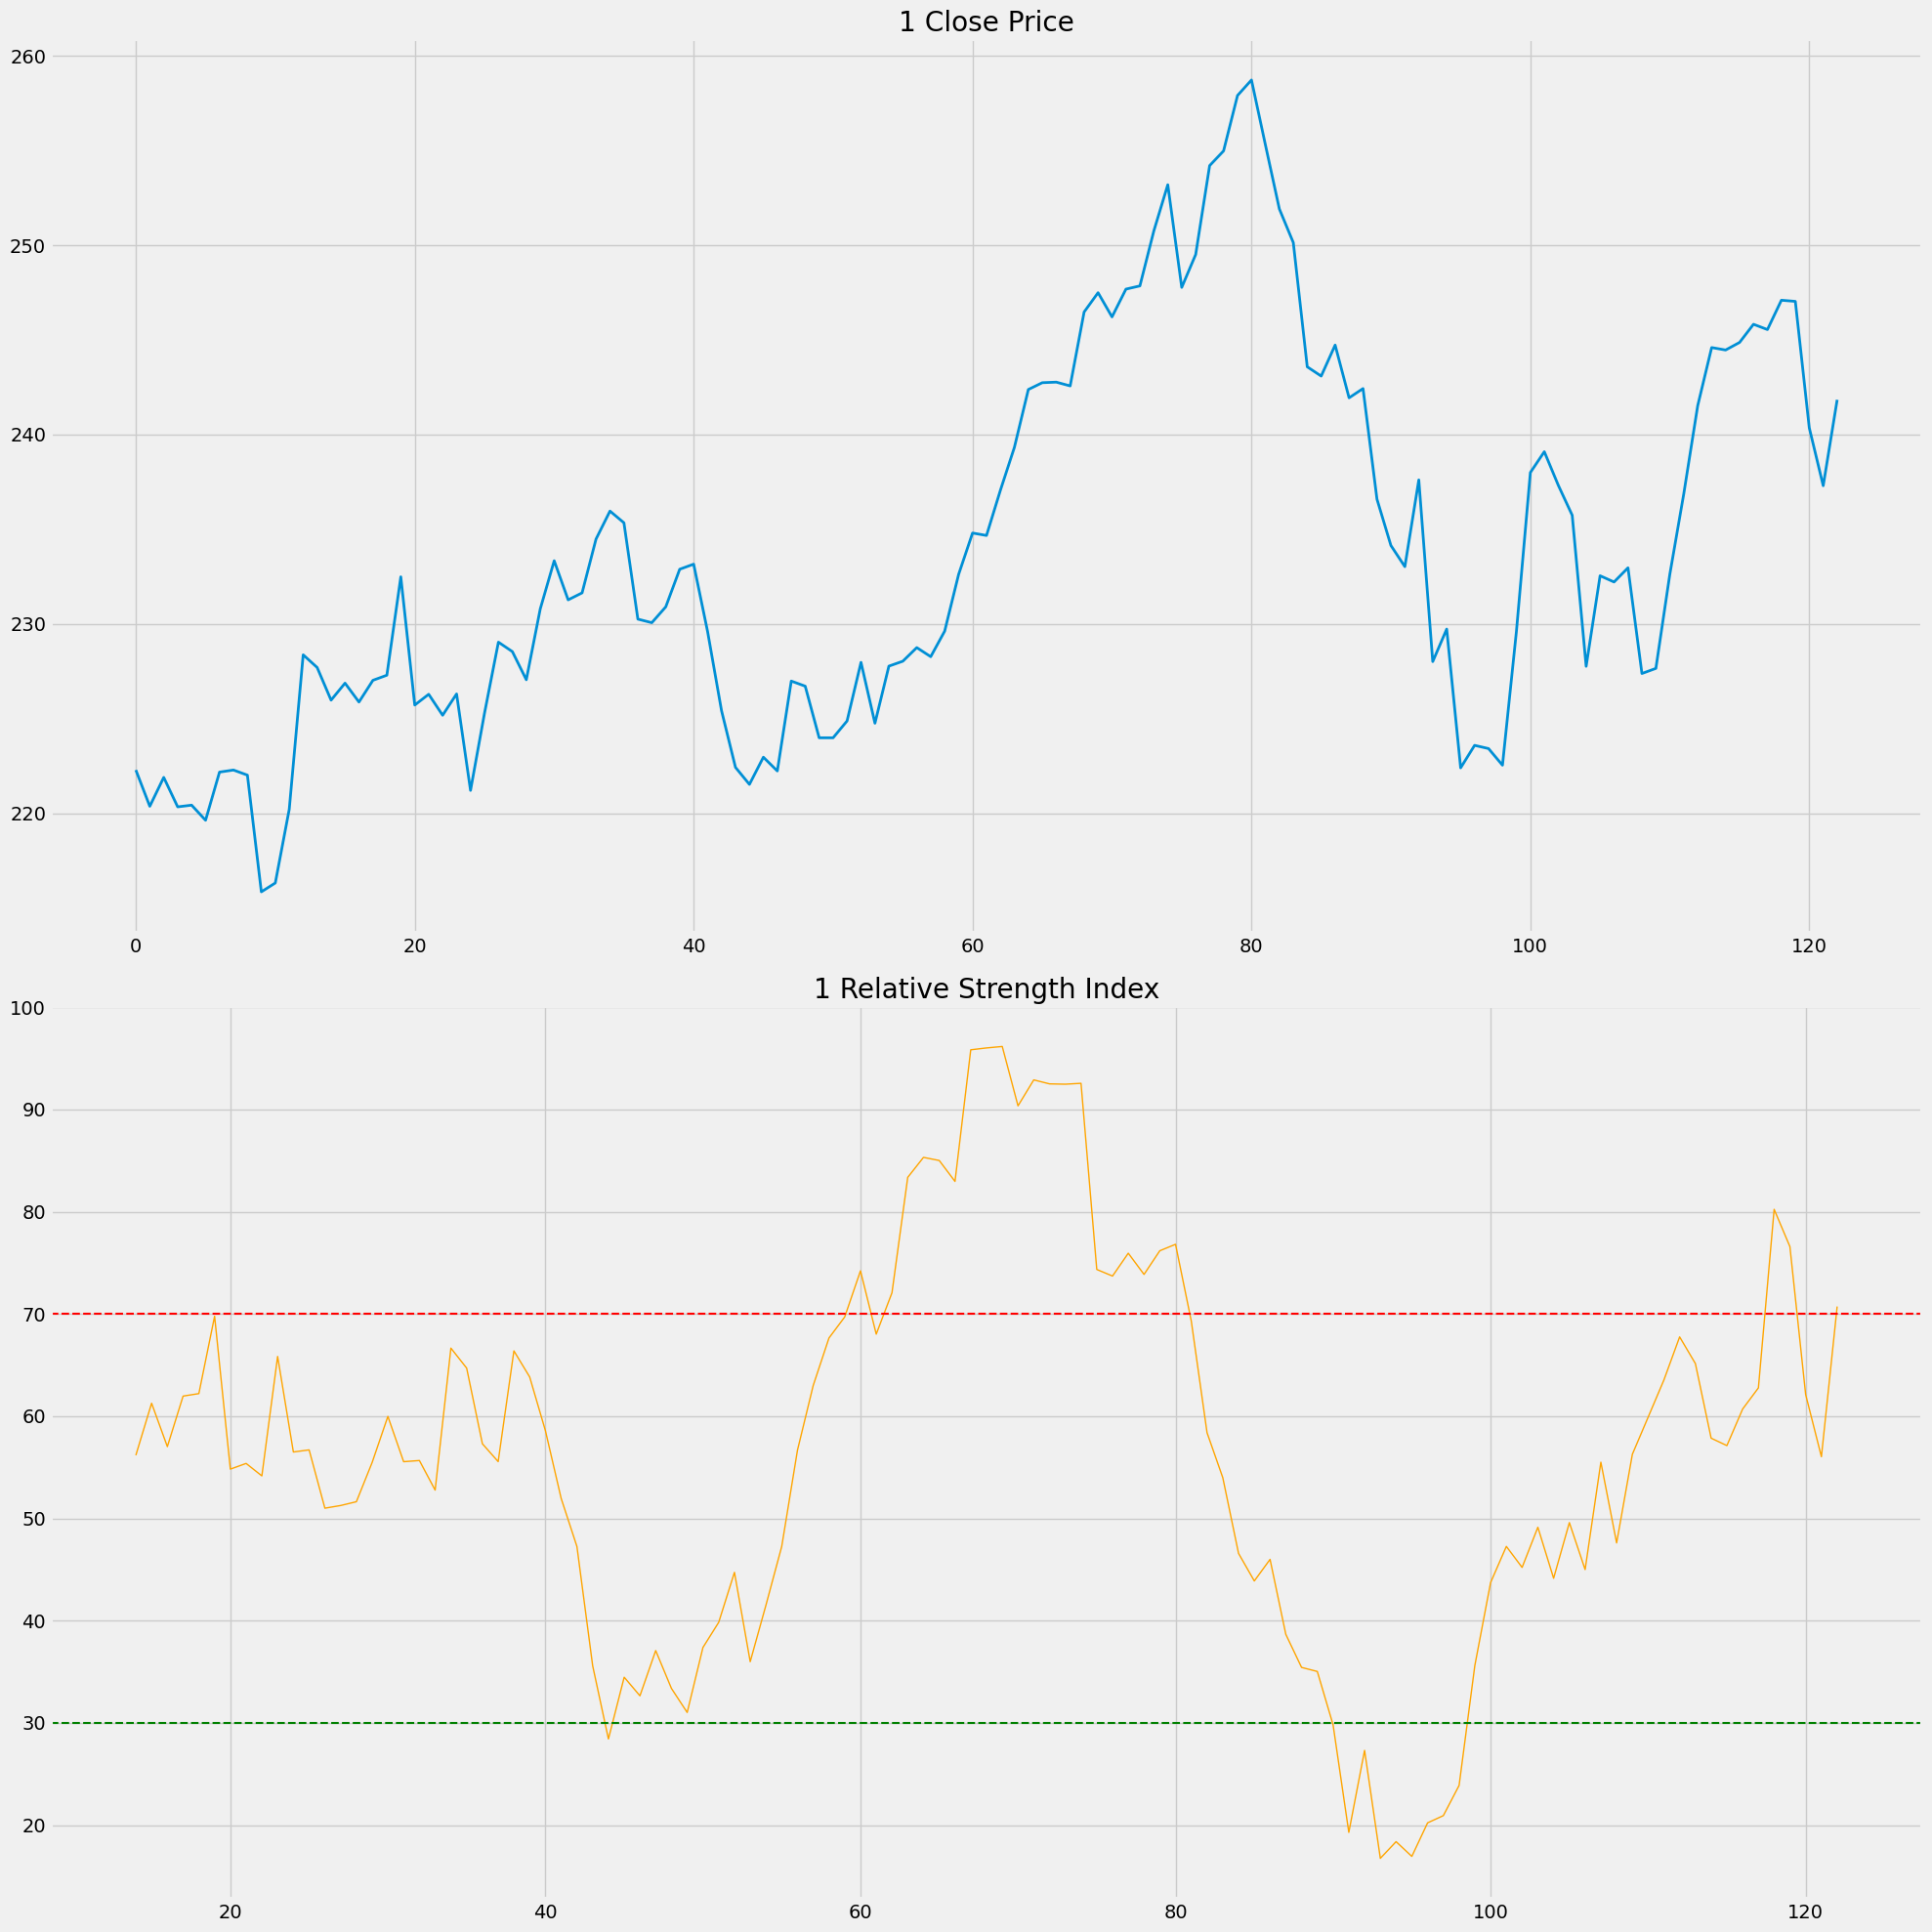

2


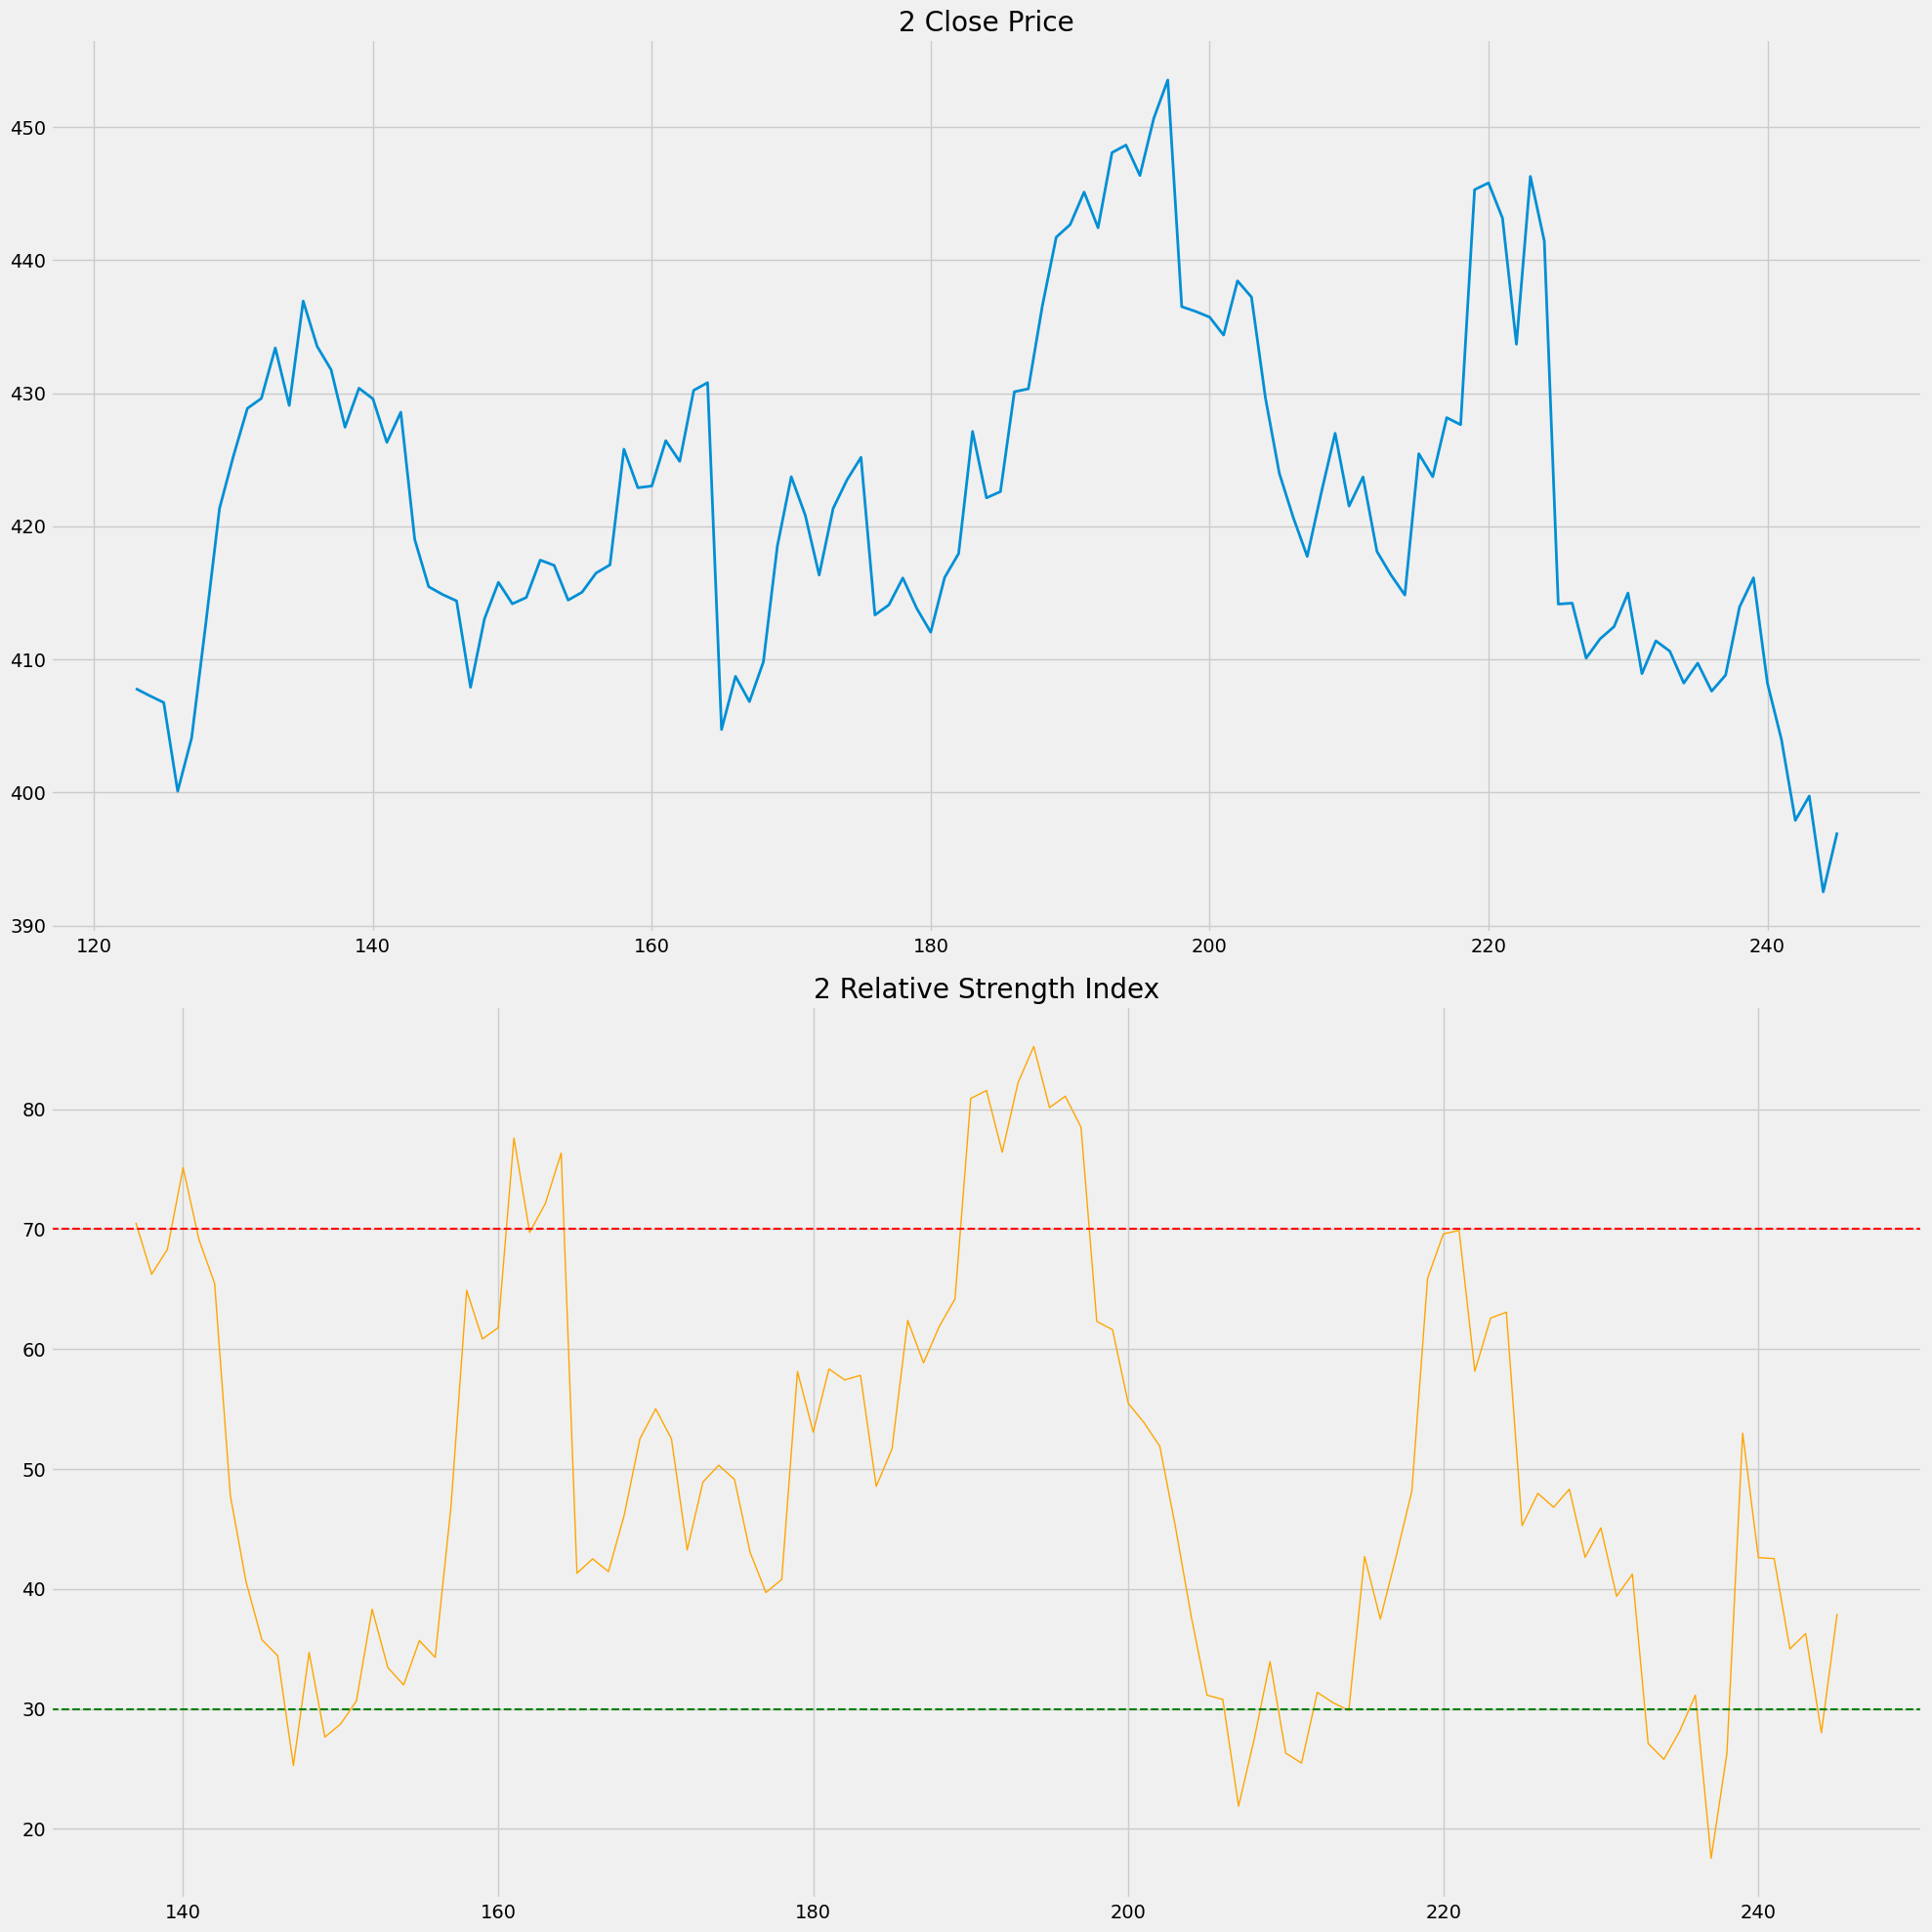

3


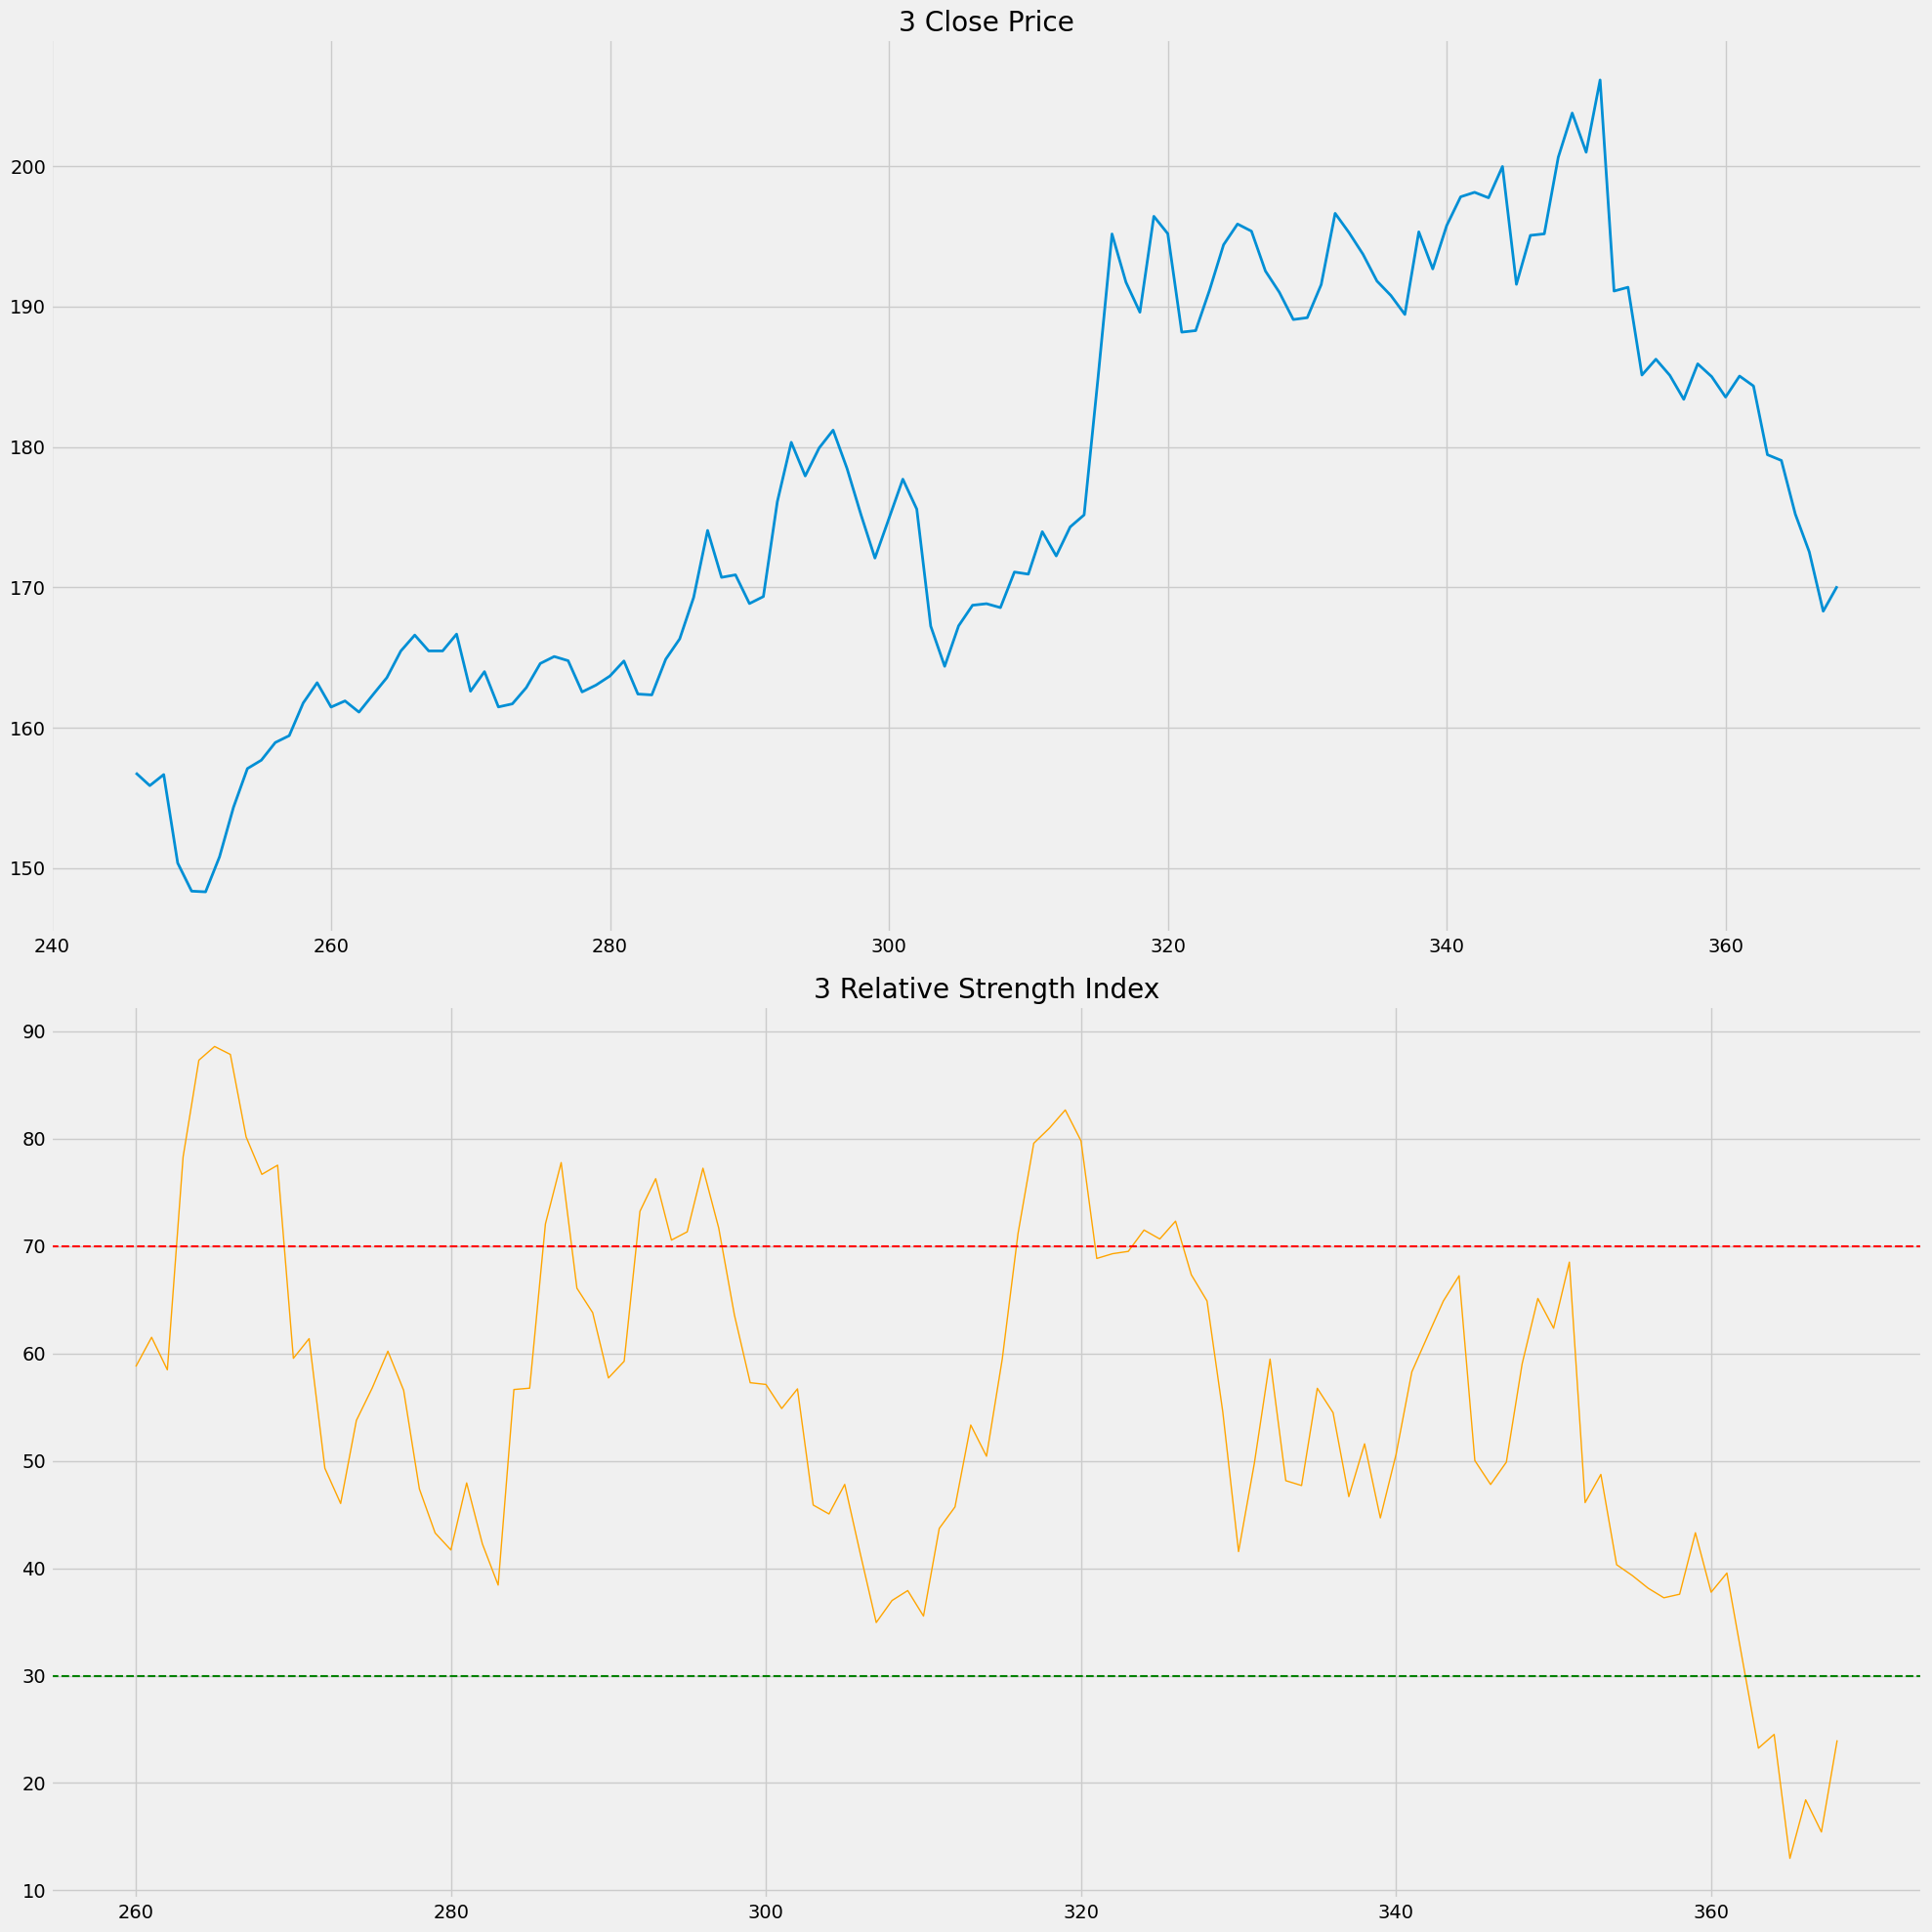

4


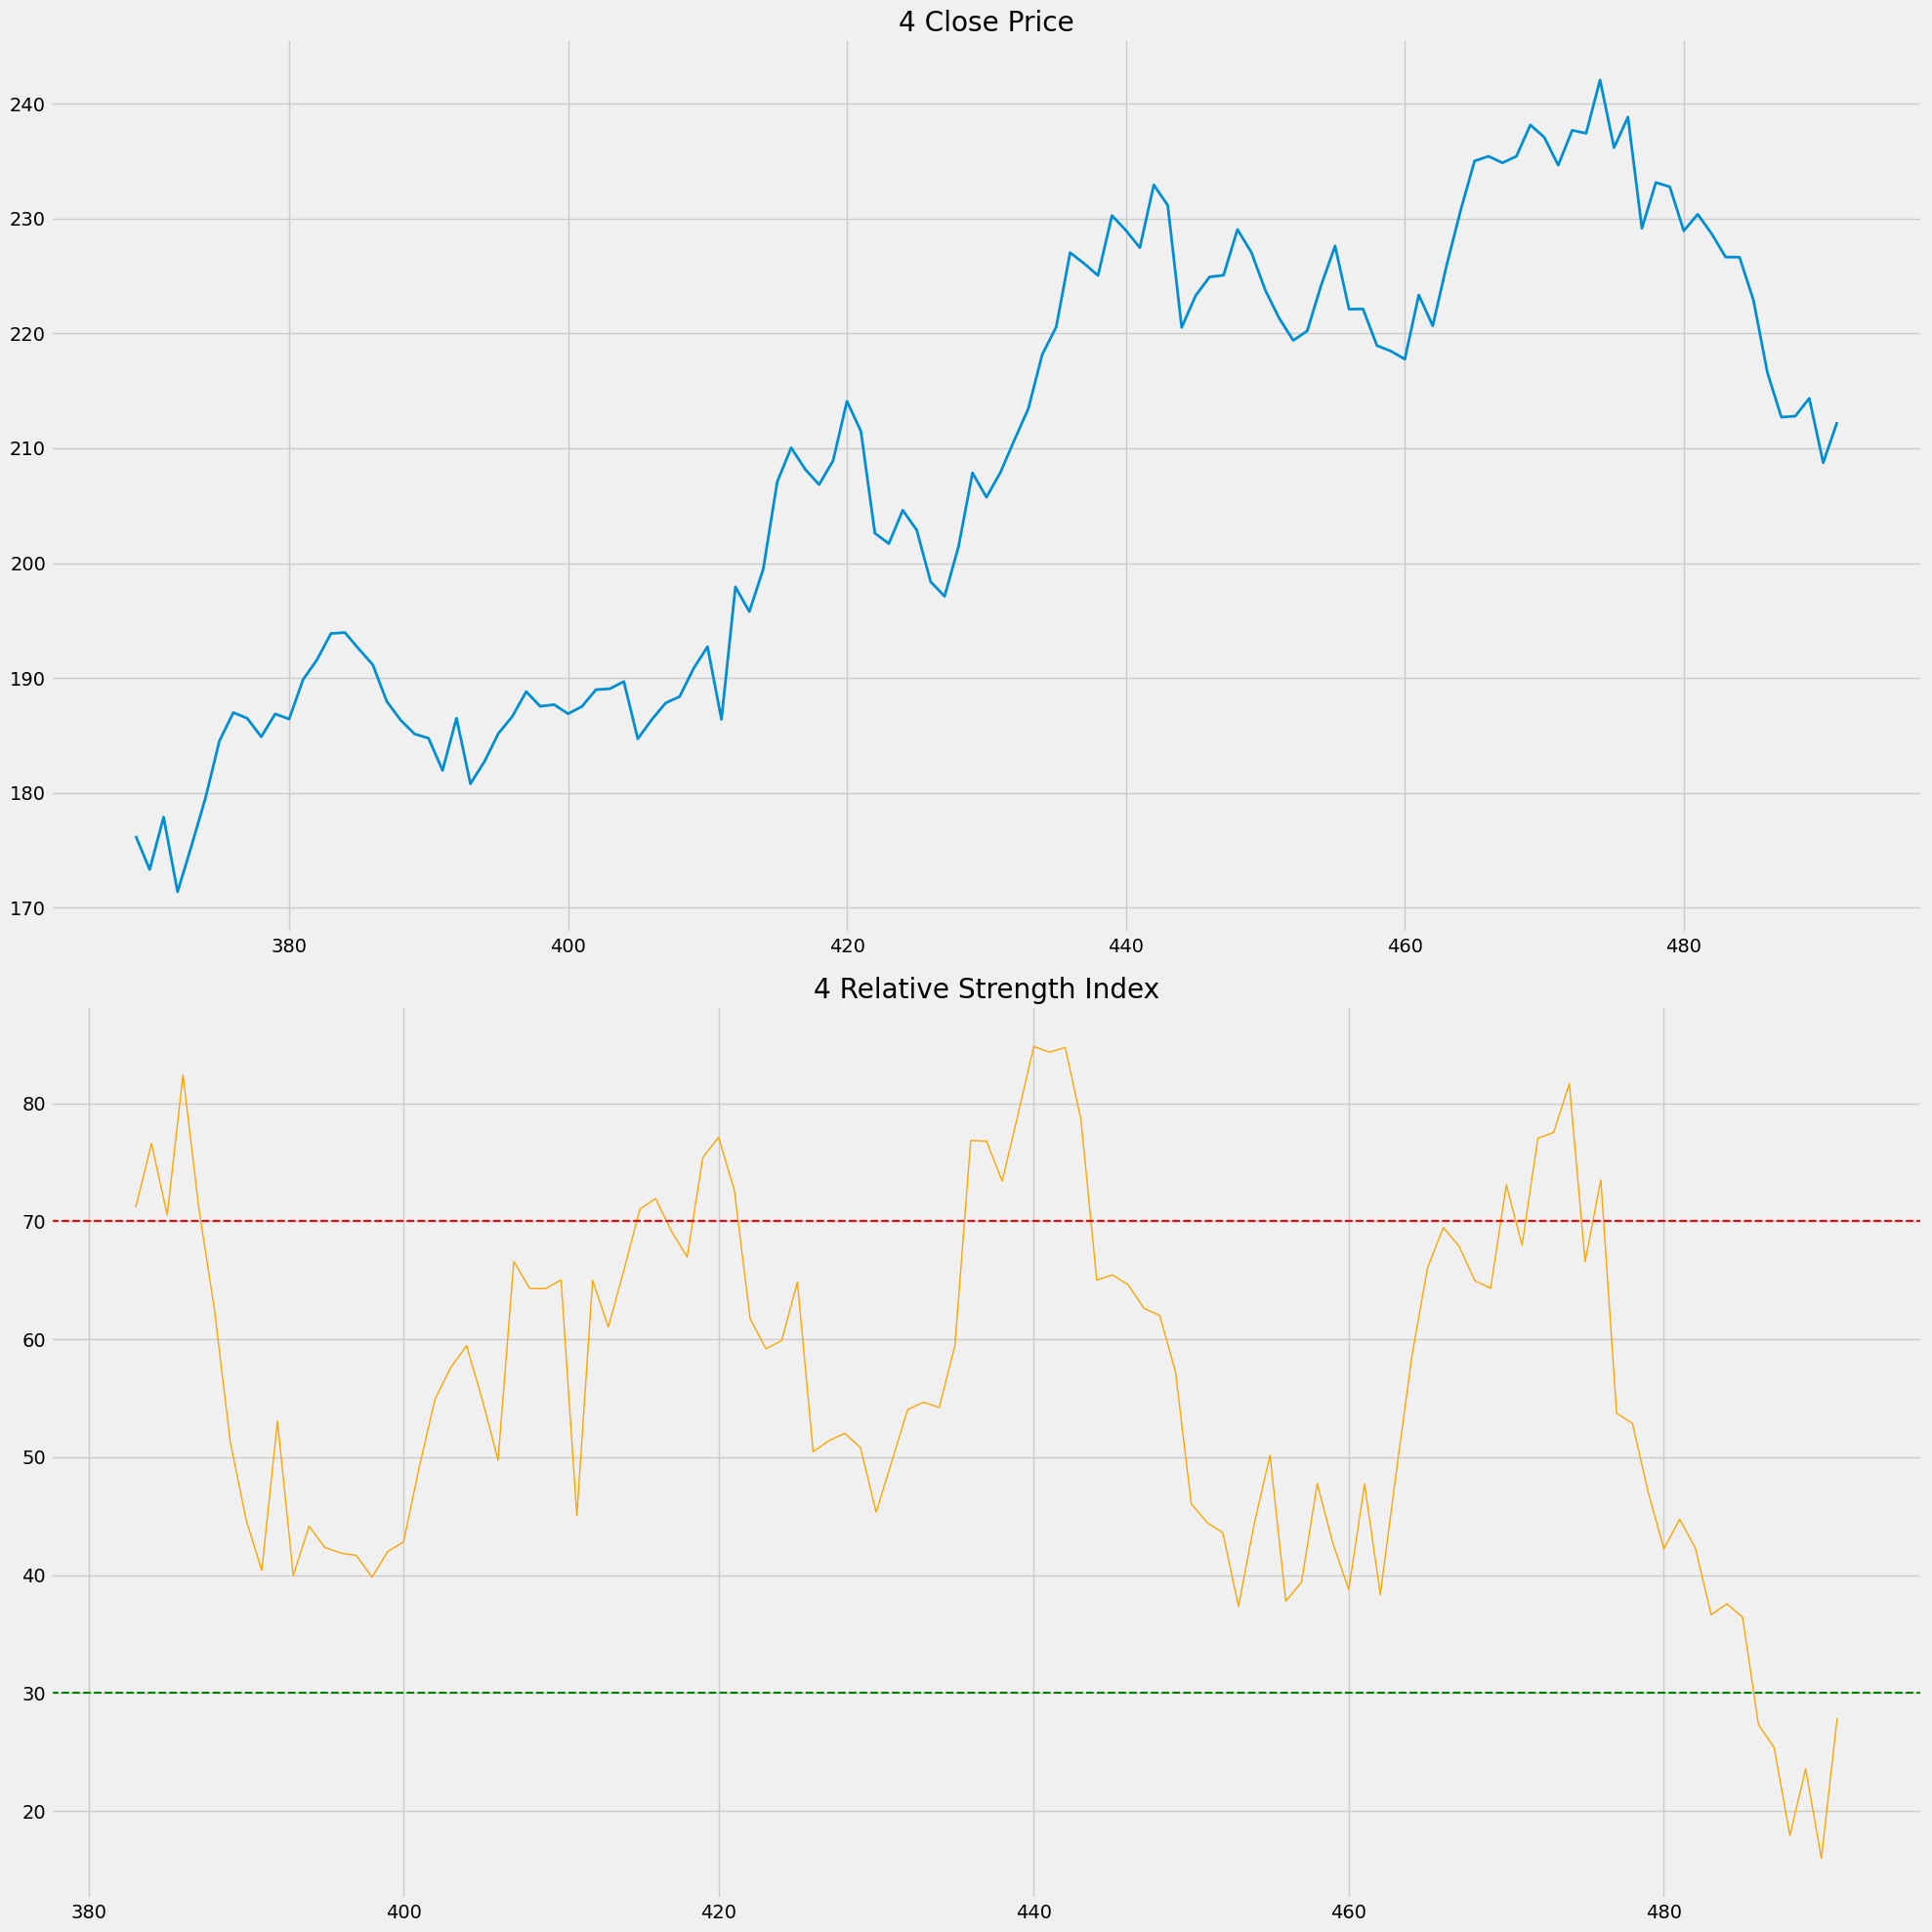

5


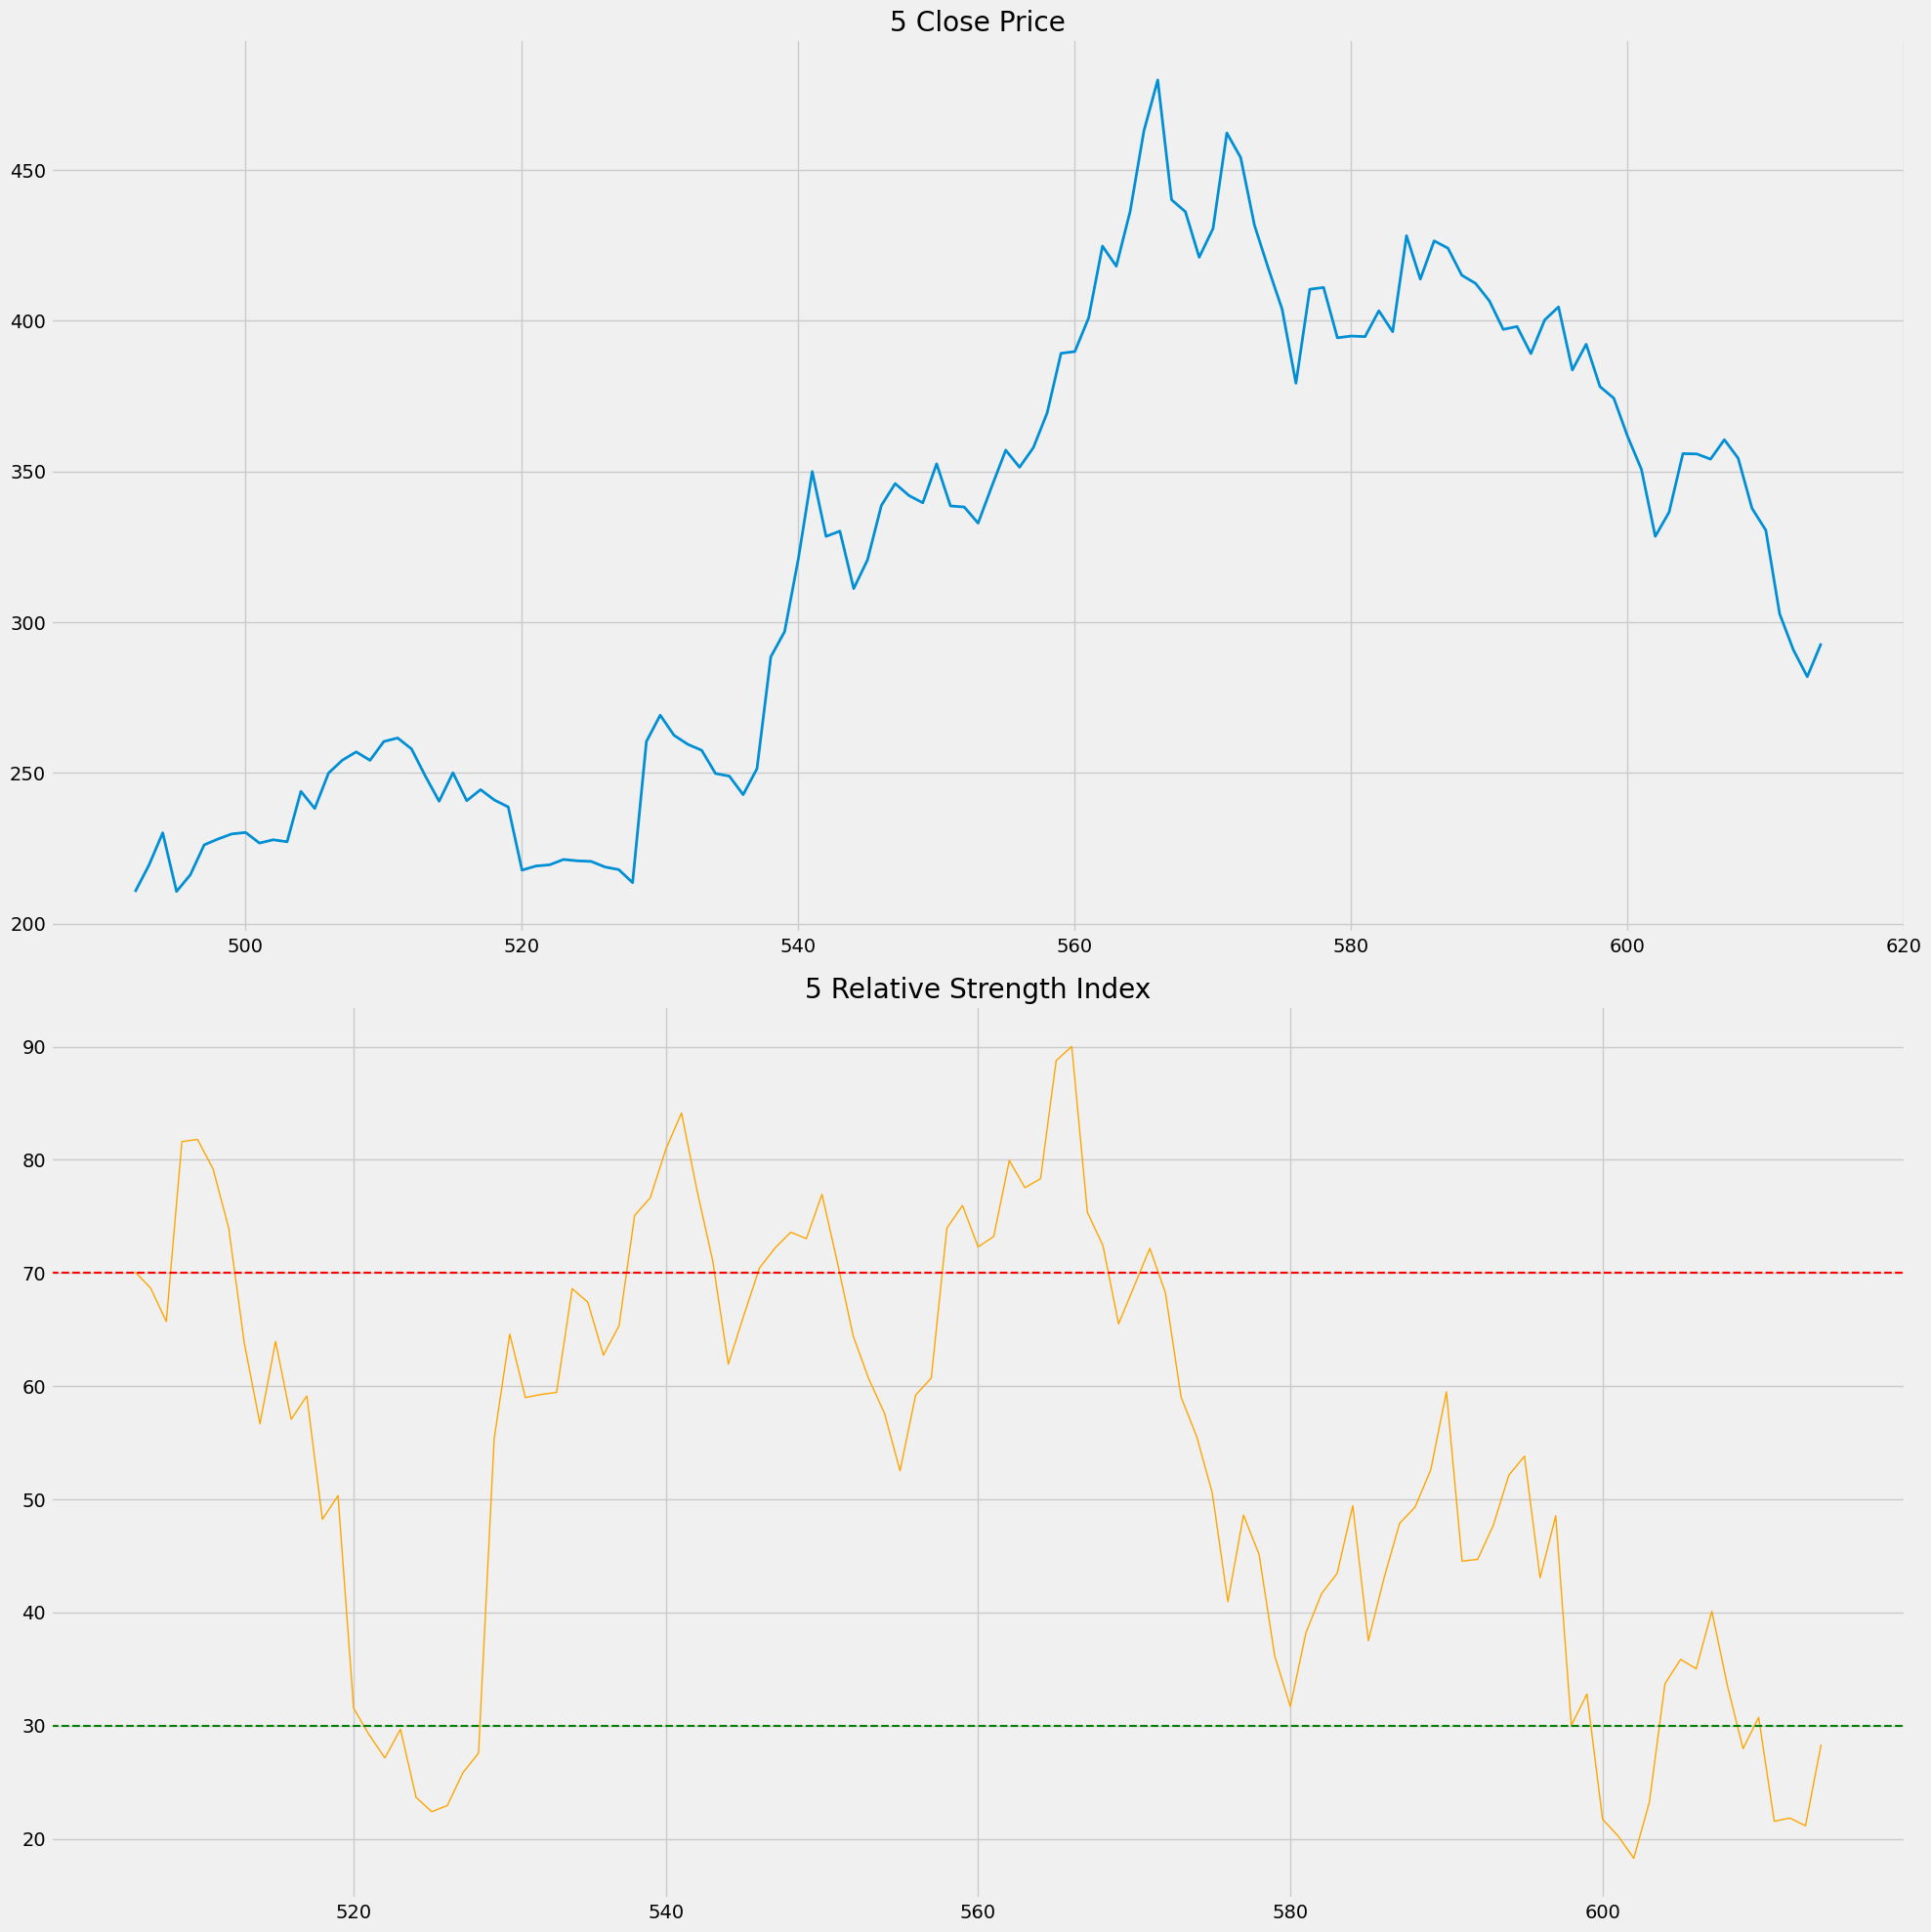

6


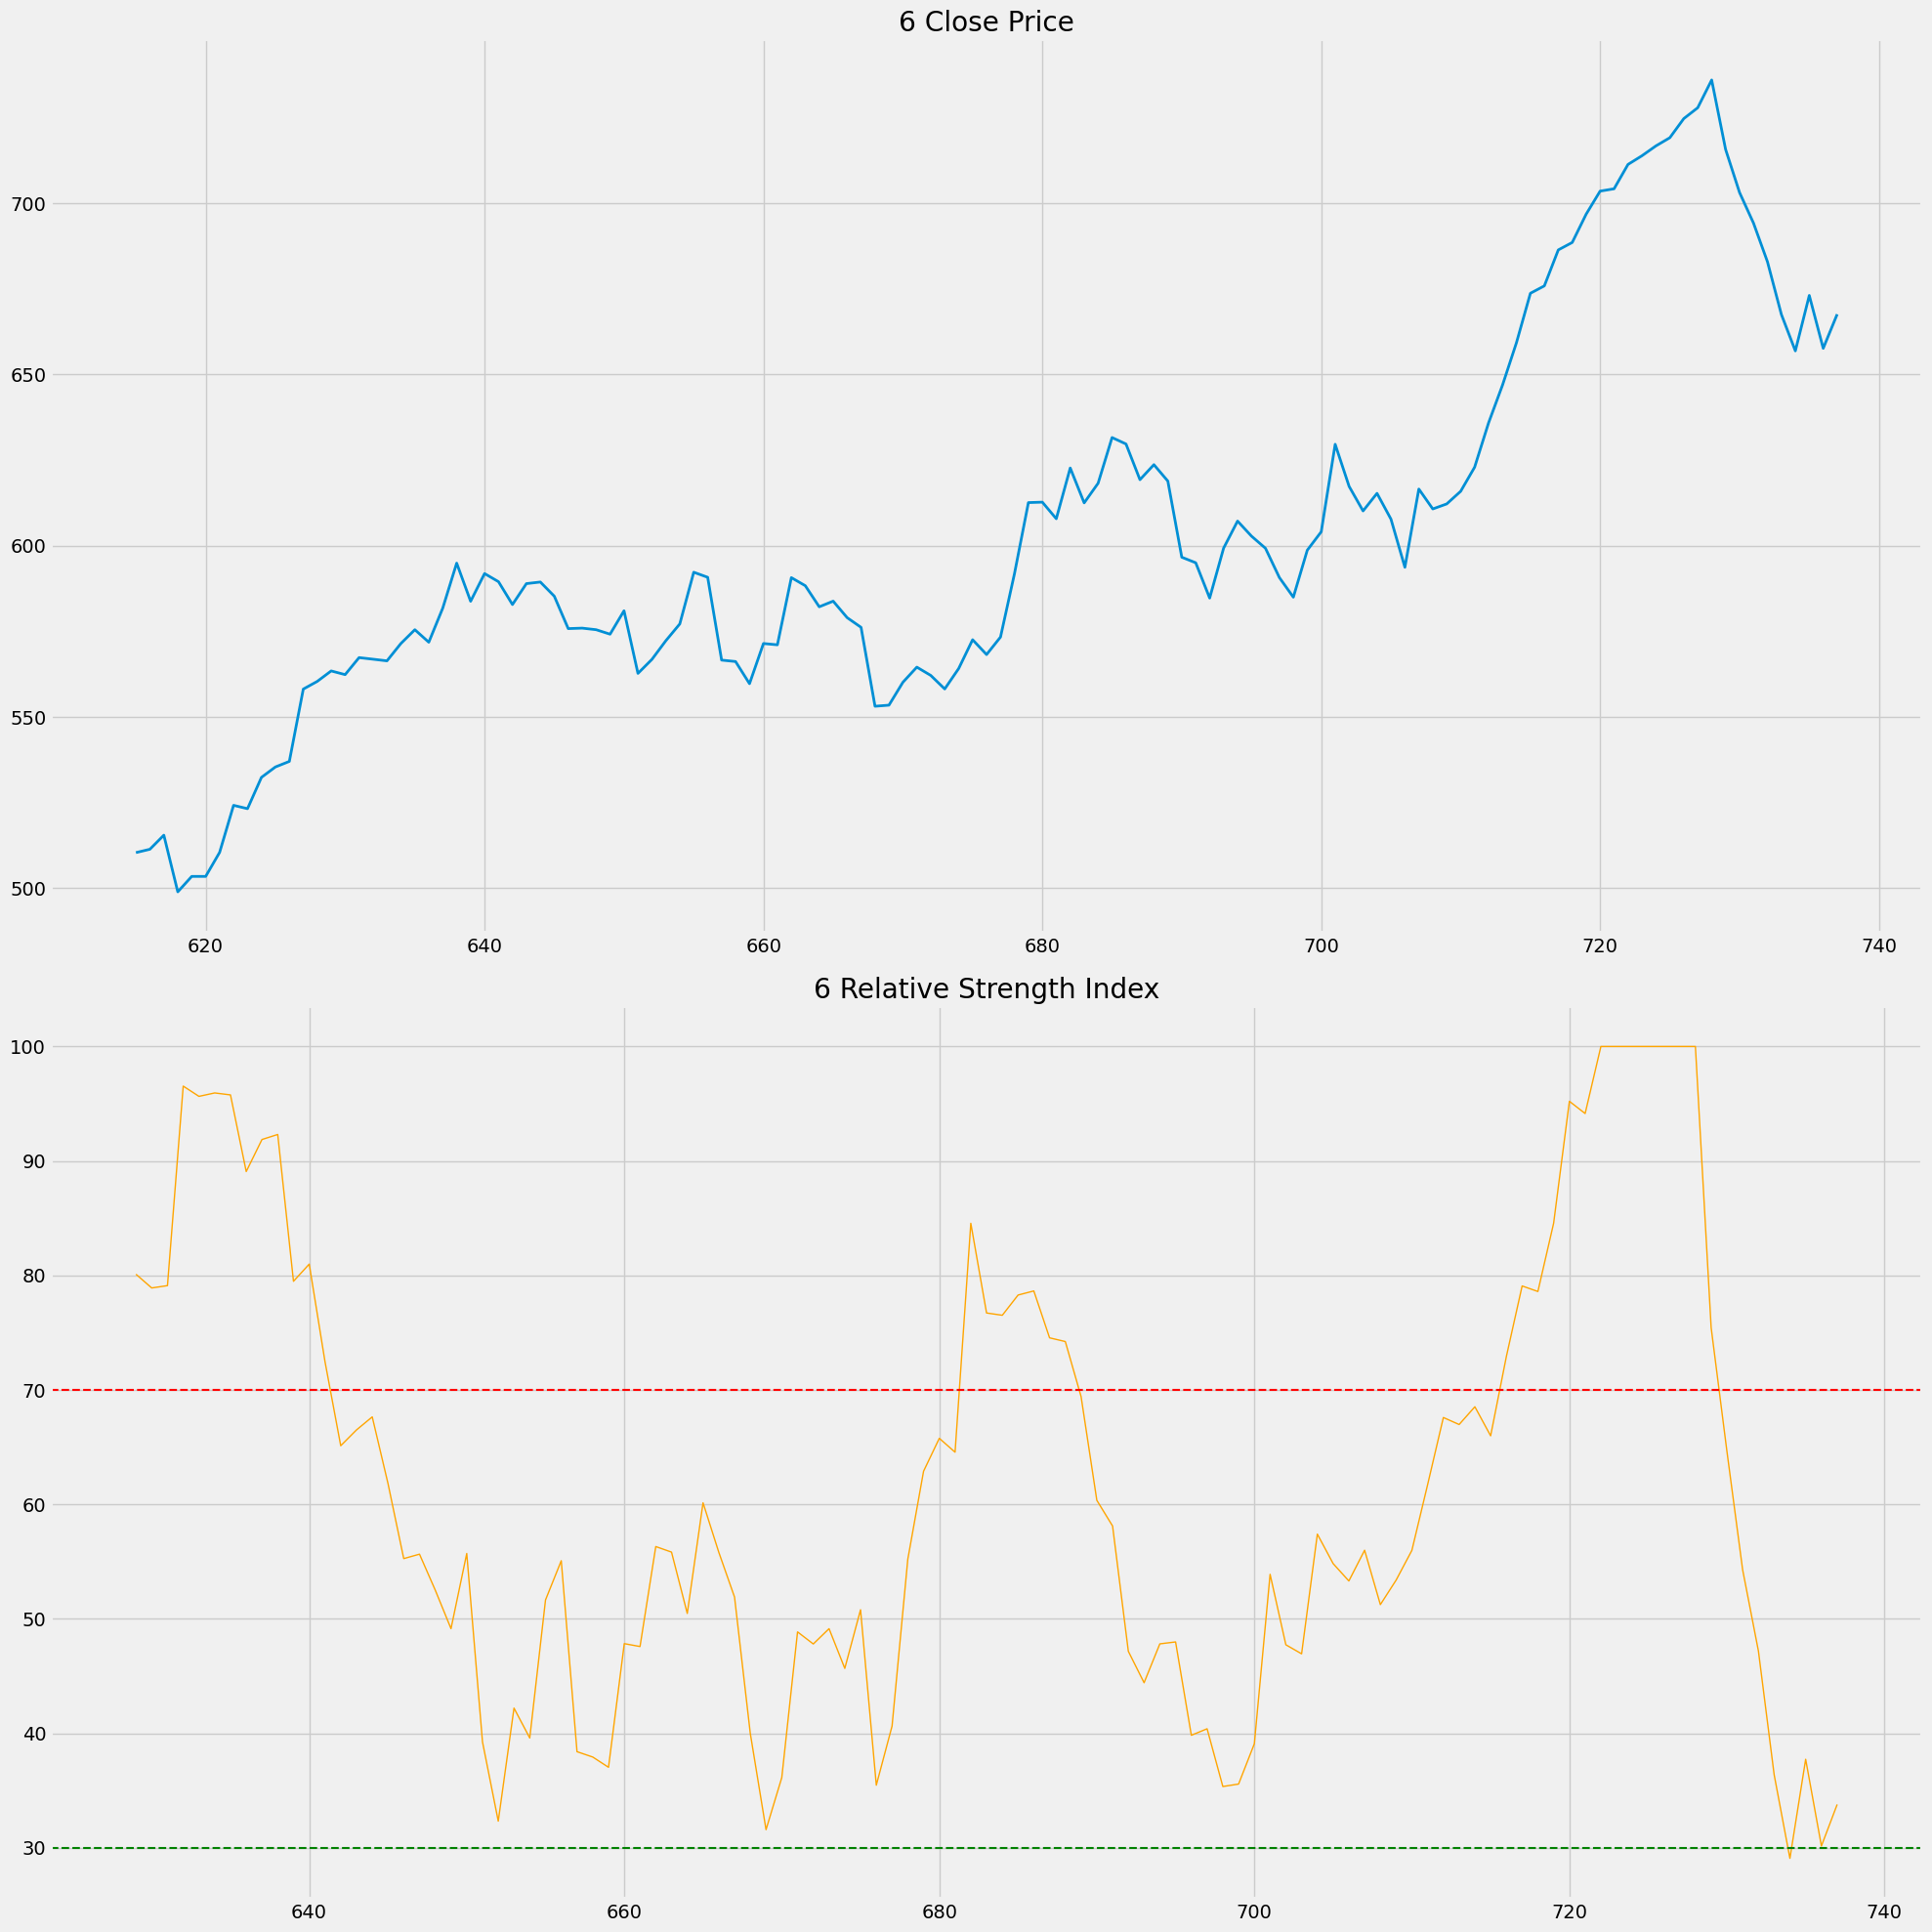

7


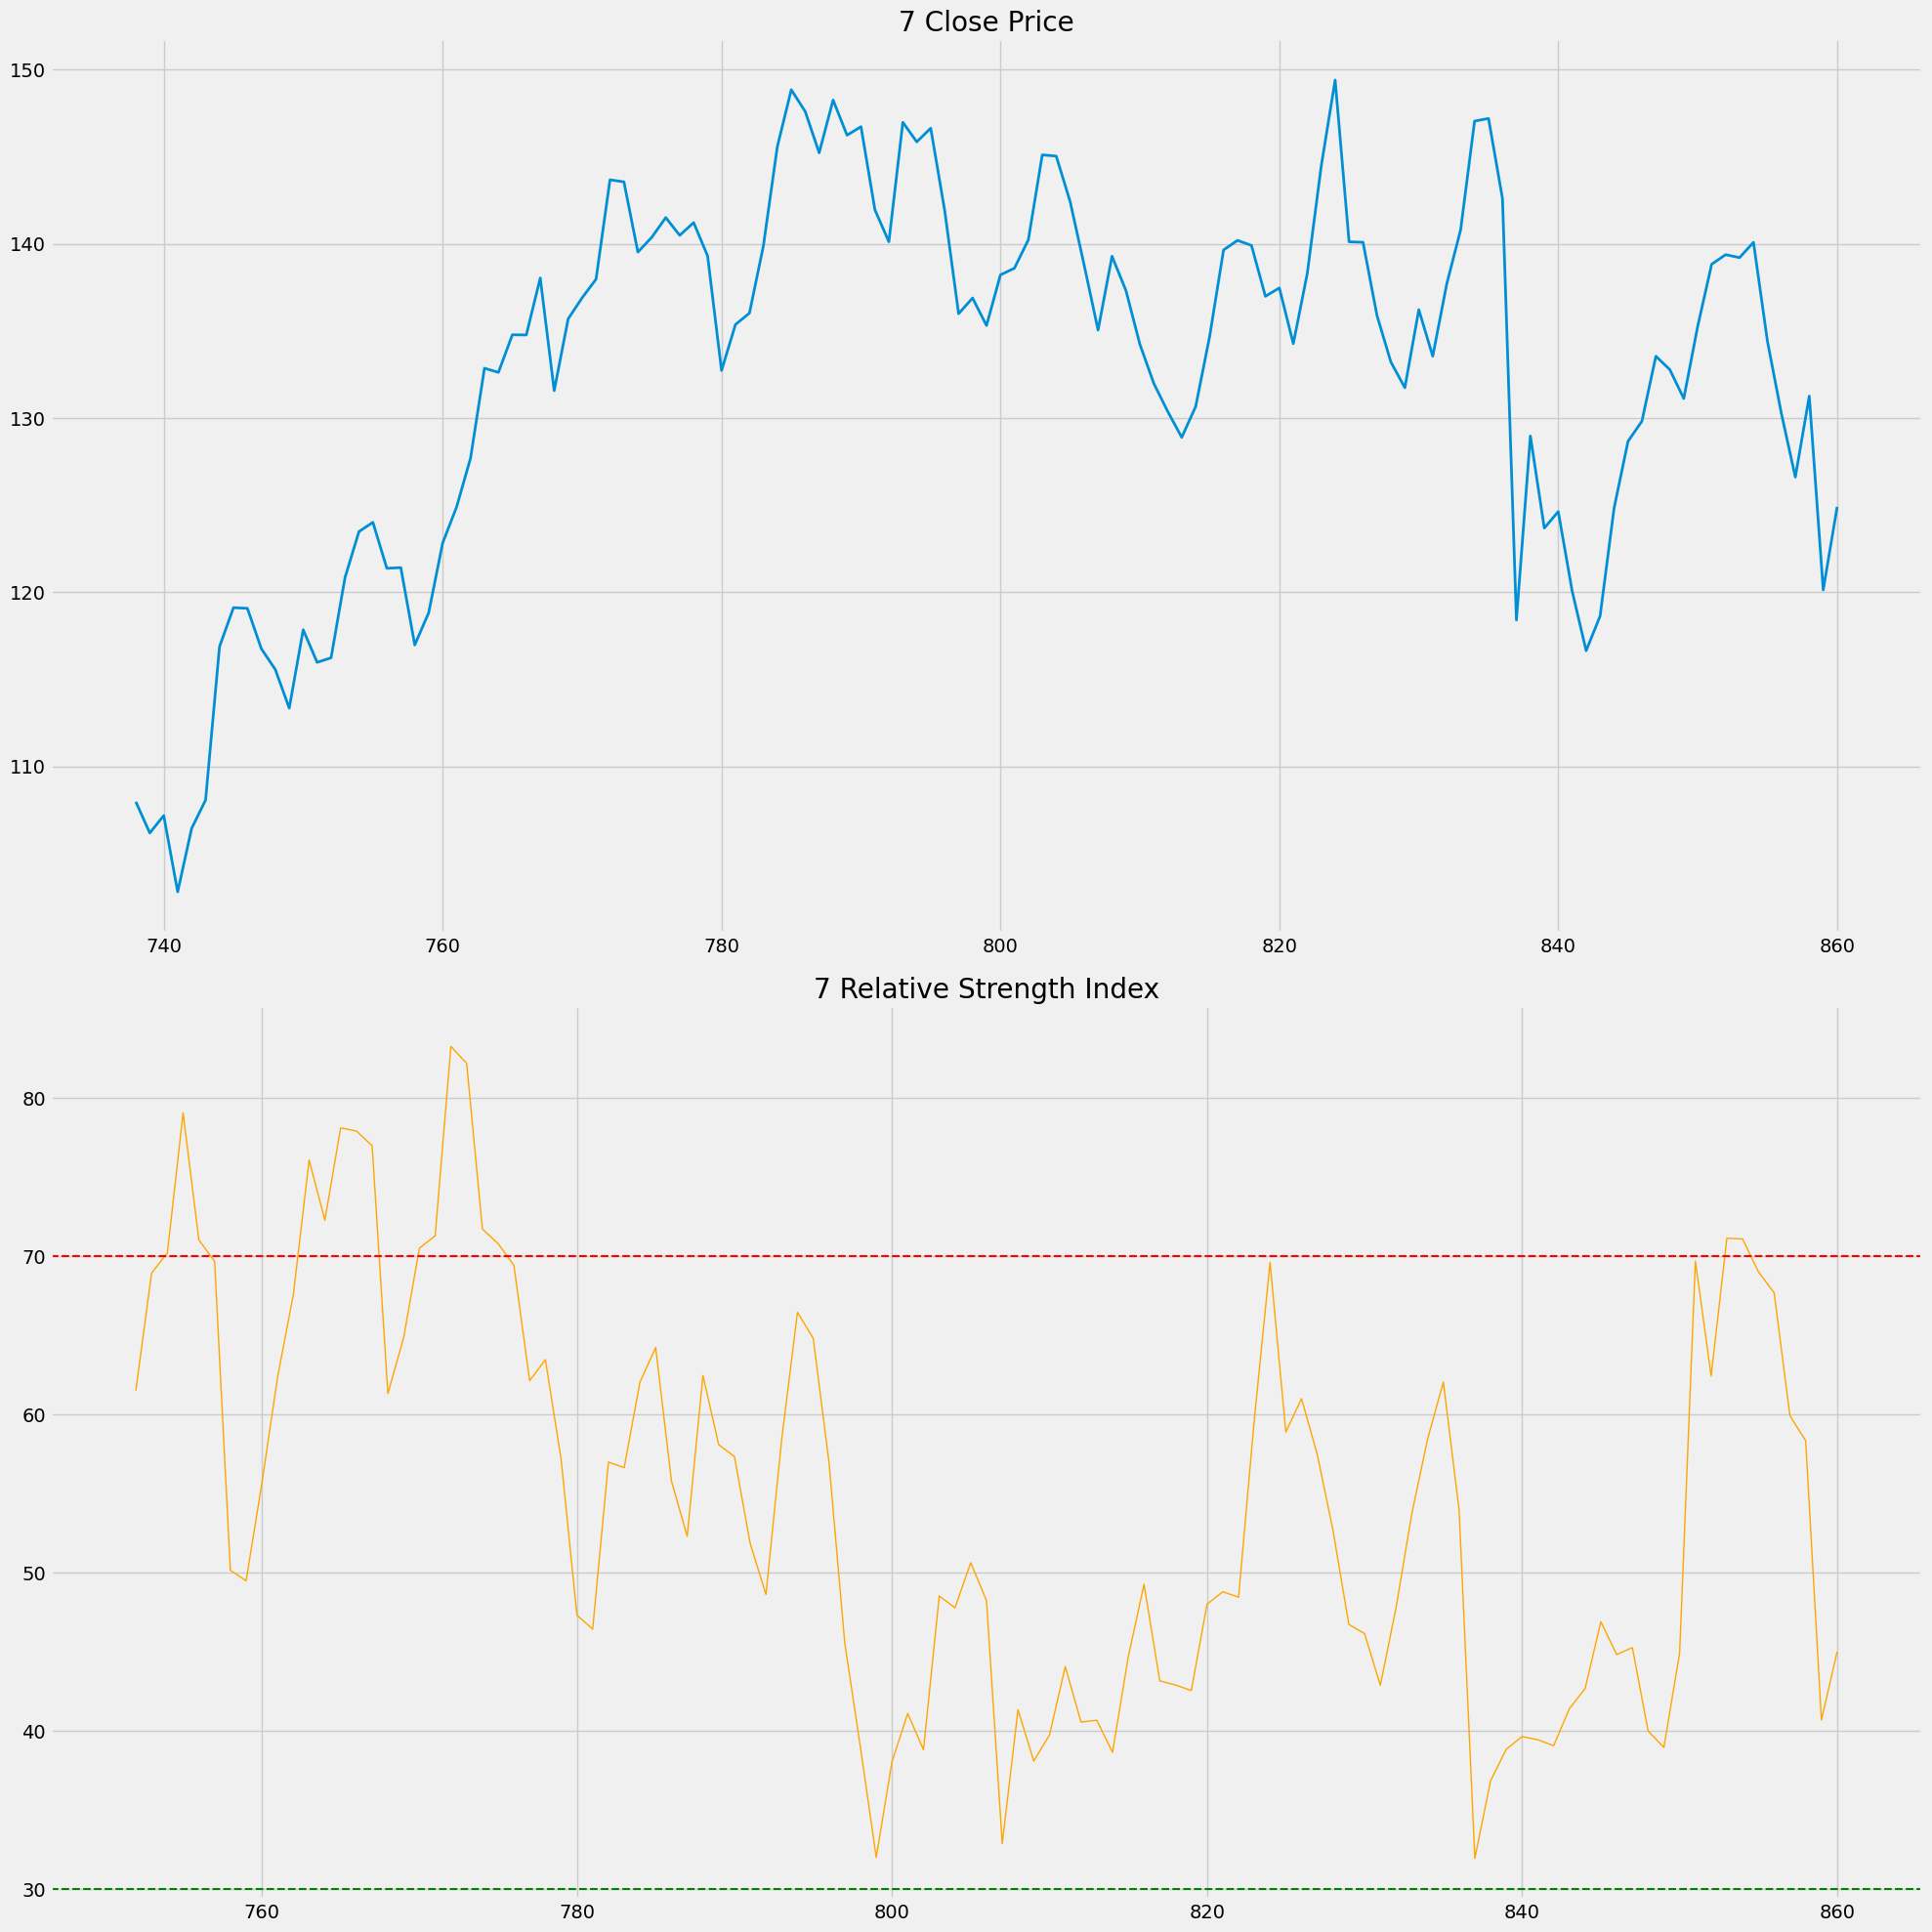

8


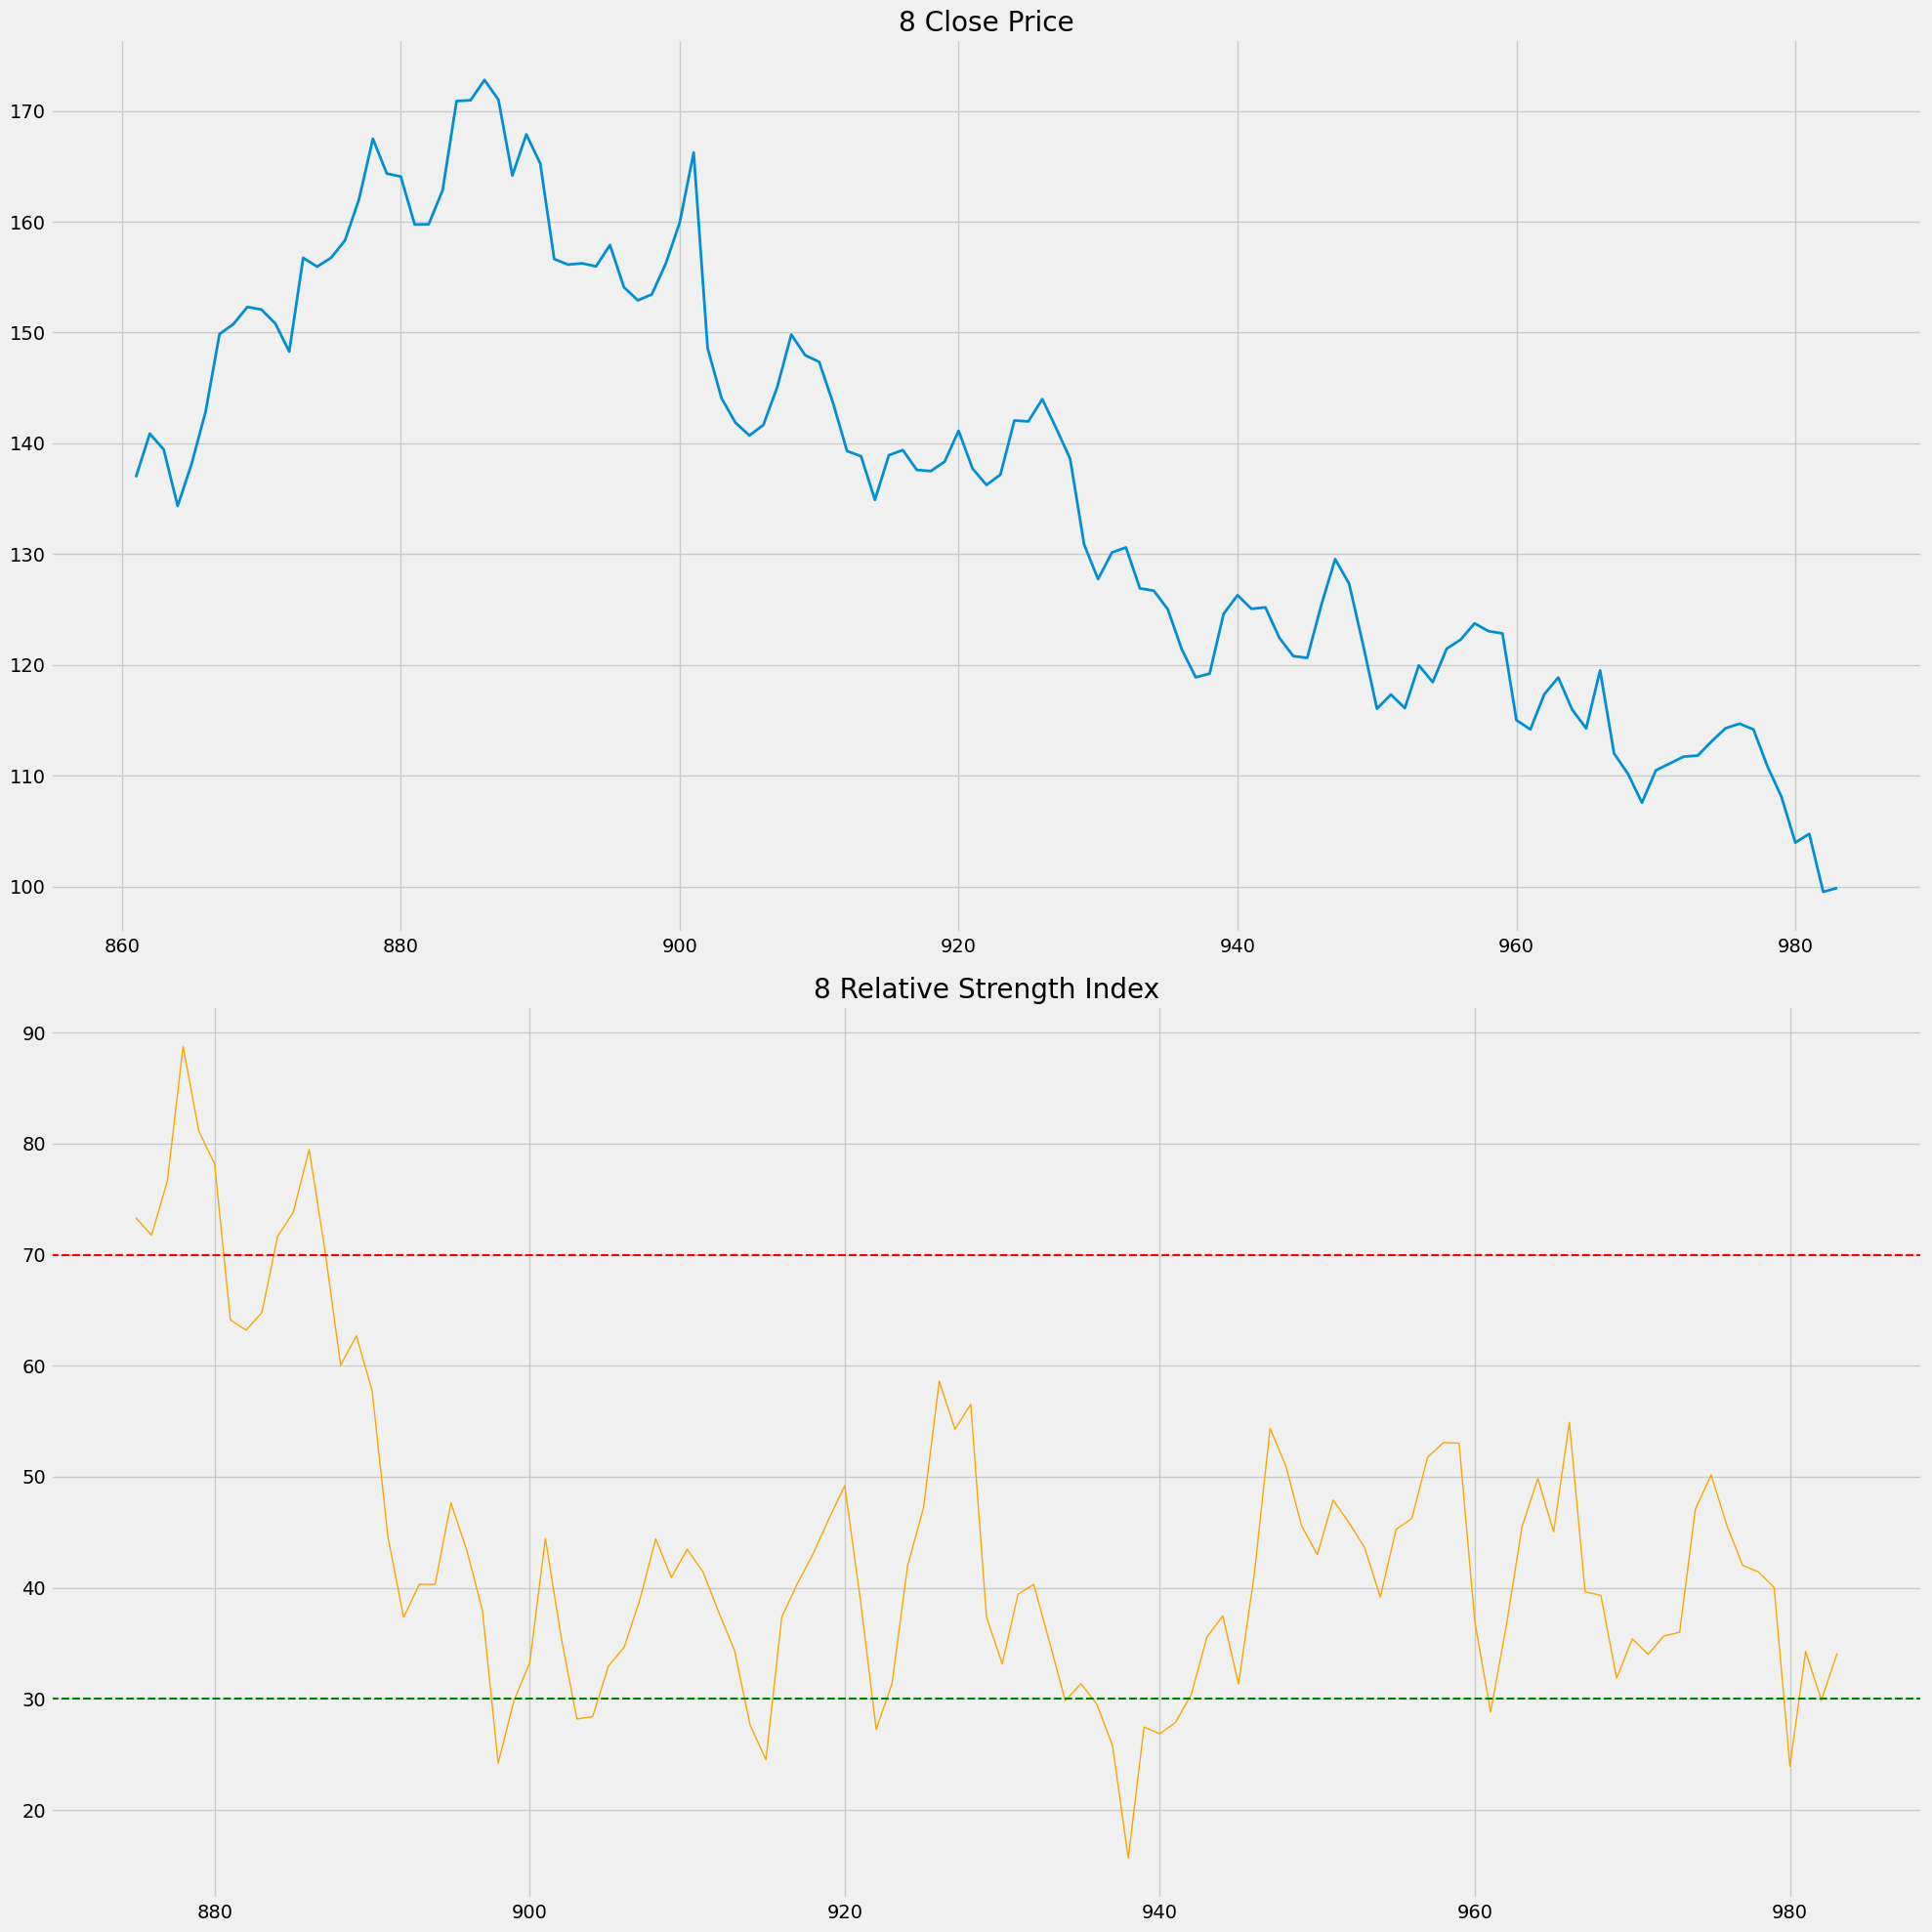

9


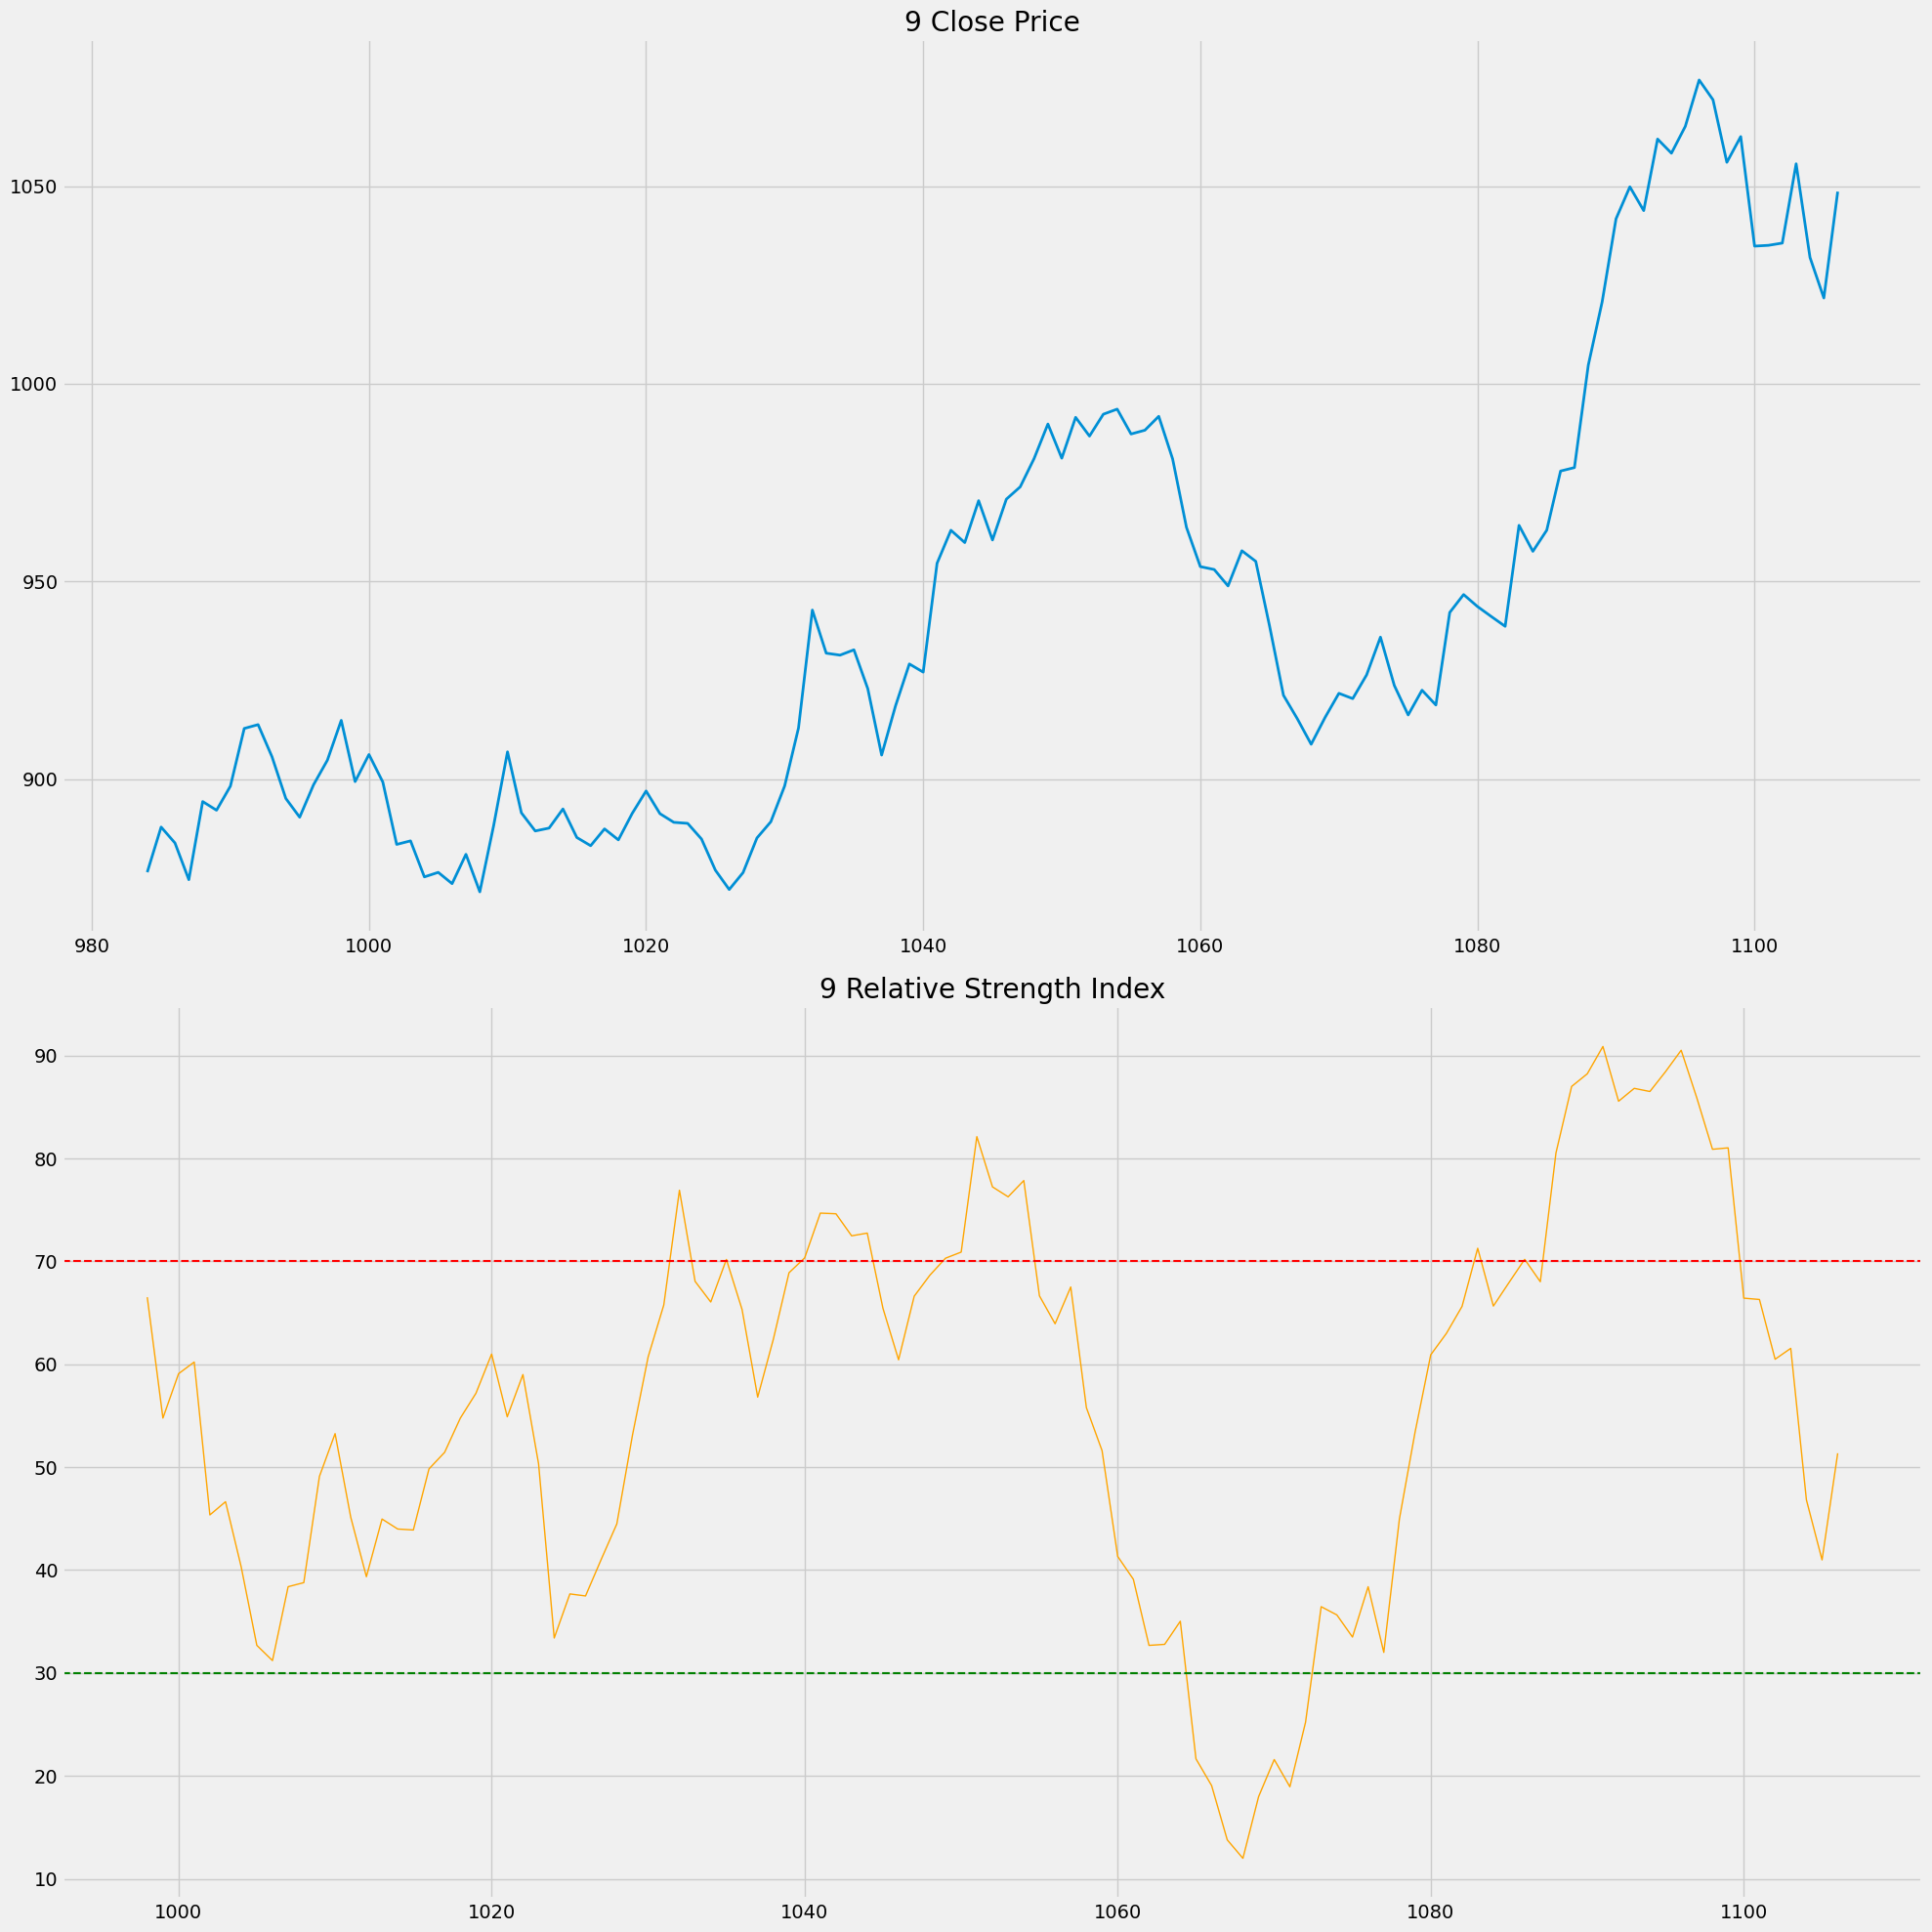

10


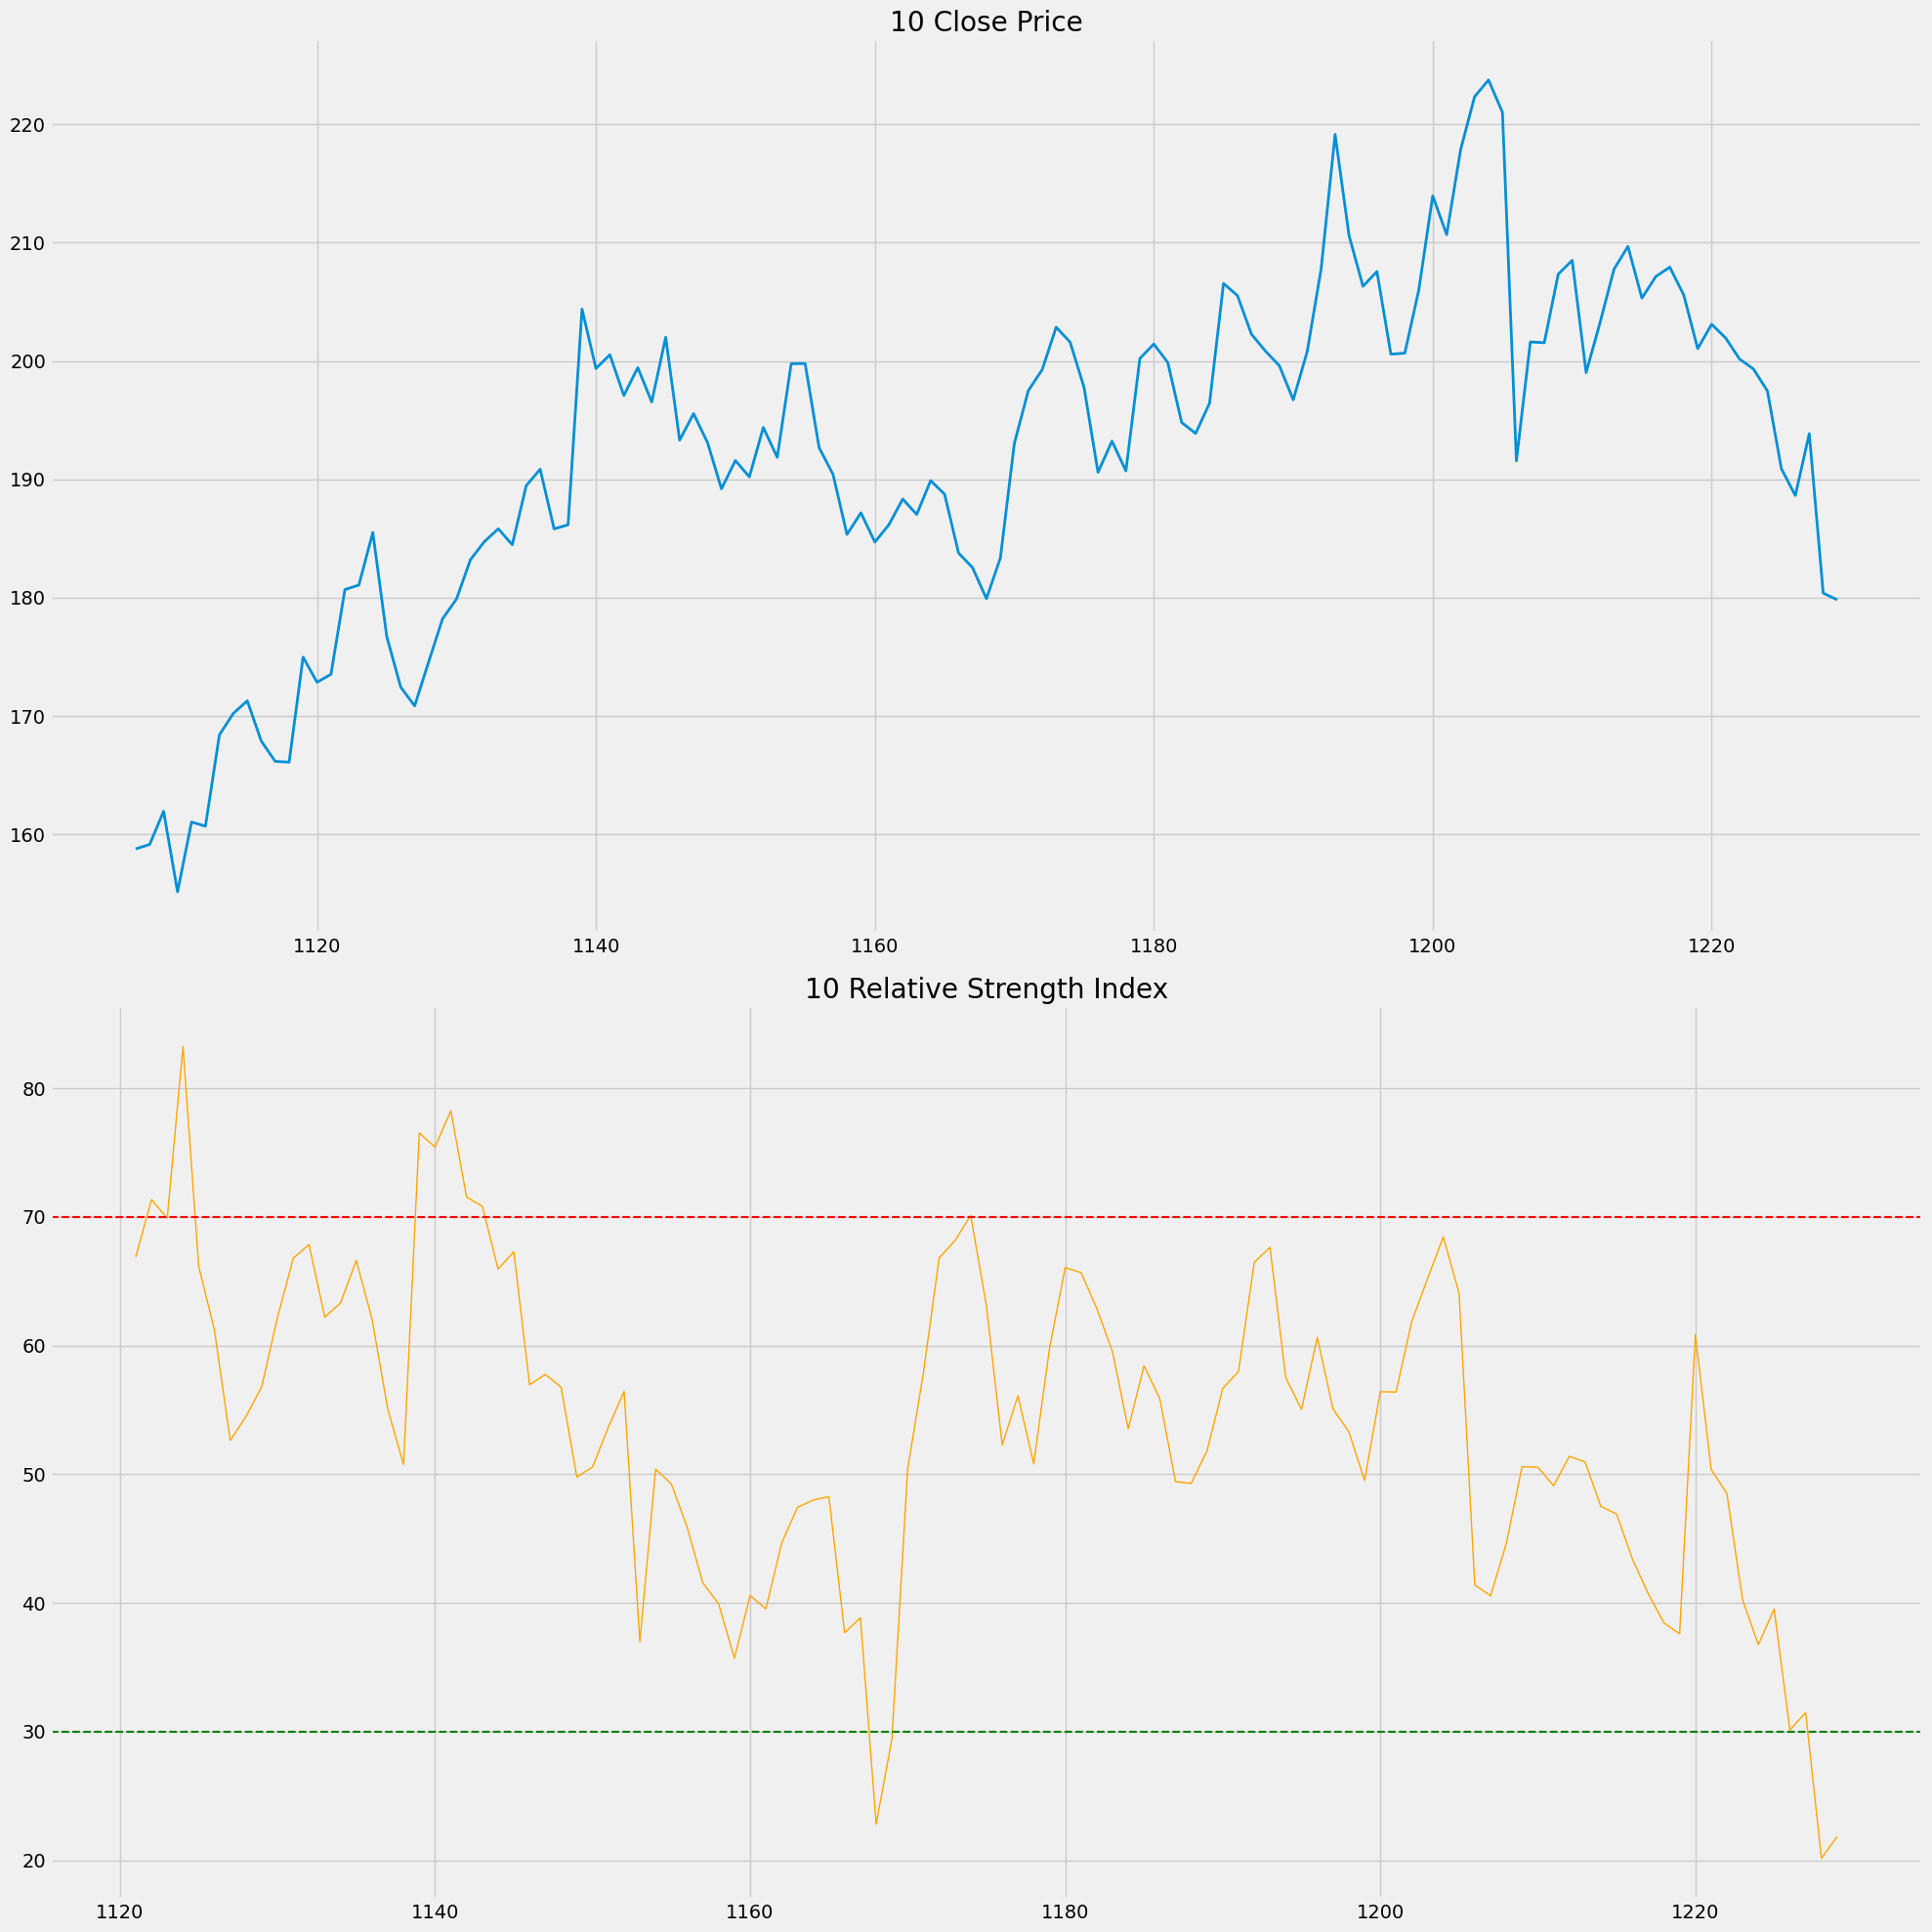

In [ ]:
df_btc = pd.read_csv('stock_prices.csv')

grouped = df_btc.groupby('stock_id')

for stock_id, stock_data in grouped:
    change = stock_data["close_price"].diff()
    change.dropna(inplace=True)

    change_up = change.copy()
    change_down = change.copy()

    change_up[change_up < 0] = 0
    change_down[change_down > 0] = 0

    avg_up = change_up.rolling(14).mean()
    avg_down = change_down.rolling(14).mean().abs()

    rsi = 100 * avg_up / (avg_up + avg_down)

    plt.style.use('fivethirtyeight')

    plt.rcParams['figure.figsize'] = (20, 20)

    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 20))

    # First chart: Plot the closing price
    ax1.plot(stock_data['close_price'], linewidth=2)
    ax1.set_title(f'{stock_id} Close Price')

    # Second chart: Plot the RSI
    ax2.set_title(f'{stock_id} Relative Strength Index')
    ax2.plot(rsi, color='orange', linewidth=1)

    ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')  # Oversold
    ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')    # Overbought

    plt.tight_layout()
    plt.show()
